# Step 1: Variable Filtering

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pickle
import missingno as msno
from scipy.stats import zscore
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
def get_bad_ratio (full_df):
    bad_count = sum(full_df.loan_status == "Default") + sum(full_df.loan_status == "Charged Off")
    return bad_count / len(full_df)

In [3]:
def list_truncation (l):
    mu = np.mean(l)
    sigma = np.std(l)
    return (l.apply(lambda x: mu + 3 * np.sign(x-mu)*sigma if abs(x-mu) >= 3*sigma else x))

In [4]:
df = pd.read_csv("LCOrigination.csv", low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280646 entries, 0 to 1280645
Columns: 128 entries, id to settlement_term
dtypes: float64(100), object(28)
memory usage: 1.2+ GB


In [6]:
df.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  1.280615e+06  1.280615e+06     1.280615e+06  1.280615e+06   
mean   1.513560e+04  1.513023e+04     1.511406e+04  1.340095e+01   
std    9.164207e+03  9.162097e+03     9.163897e+03  4.923413e+00   
min    5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%    8.000000e+03  8.000000e+03     8.000000e+03  9.930000e+00   
50%    1.300000e+04  1.300000e+04     1.300000e+04  1.279000e+01   
75%    2.000000e+04  2.000000e+04     2.000000e+04  1.614000e+01   
max    4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  1.280615e+06  1.280615e+06  1.279707e+06  1.280615e+06    1.280615e+06   
mean   4.488773e+02  7.715590e+04  1.898675e+01  3.123031e-01    6.973707e+02   
std    2.672979e+02  7.592994e+04  1.399290e+01  8.765886e-01    3.246384e+01   
min    4.930000e+00  0.000000e+00 -1.000000e+00  0.000000e+00    6.250000e+02   
25%    2.552500e+02  4.550000e+04  1.206000e+01  0.000000e+00    6.700000e+02   
50%    3.816400e+02  6.500000e+04  1.805000e+01  0.000000e+00    6.900000e+02   
75%    5.953100e+02  9.200000e+04  2.472000e+01  0.000000e+00    7.150000e+02   
max    1.719830e+03  1.099920e+07  9.990000e+02  5.800000e+01    8.450000e+02   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count     1.280615e+06    1.280615e+06           628835.000000   
mean      7.013708e+02    5.947806e-01               34.449293   
std       3.246464e+01    8.894871e-01               21.895522   
min       6.290000e+02    0.000000e+00                0.000000   
25%       6.740000e+02    0.000000e+00               16.000000   
50%       6.940000e+02    0.000000e+00               31.000000   
75%       7.190000e+02    1.000000e+00               50.000000   
max       8.500000e+02    8.000000e+00              226.000000   

       mths_since_last_record      open_acc       pub_rec     revol_bal  \
count           208313.000000  1.280615e+06  1.280615e+06  1.280615e+06   
mean                72.178462  1.164713e+01  2.031743e-01  1.650072e+04   
std                 26.305291  5.645846e+00  5.793561e-01  2.256024e+04   
min                  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%                 55.000000  8.000000e+00  0.000000e+00  5.946000e+03   
50%                 74.000000  1.100000e+01  0.000000e+00  1.128700e+04   
75%                 92.000000  1.400000e+01  0.000000e+00  2.013000e+04   
max                129.000000  9.700000e+01  8.600000e+01  2.904836e+06   

         revol_util     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  1.279638e+06  1.280615e+06  1.280615e+06   1.280615e+06  1.280615e+06   
mean   5.079371e+01  2.421469e+01  3.860562e+03   3.859707e+03  1.165618e+04   
std    2.466973e+01  1.200294e+01  7.133214e+03   7.132306e+03  9.667649e+03   
min    0.000000e+00  2.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    3.210000e+01  1.500000e+01  0.000000e+00   0.000000e+00  4.369165e+03   
50%    5.090000e+01  2.200000e+01  0.000000e+00   0.000000e+00  8.903200e+03   
75%    6.980000e+01  3.100000e+01  5.140220e+03   5.137990e+03  1.630571e+04   
max    8.923000e+02  1.760000e+02  4.000000e+04   4.000000e+04  6.329688e+04   

       total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  \
count     1.280615e+06   1.280615e+06        1.280615e+06  1.280615e+06   
mean      8.927372e+03   2.473136e+03        2.034910e+00  2.536364e+02   
std       8.116407e+03   2.699846e+03        1.375902e+01  9.788124e+02   
min       0.000000e+00   0.000000e+00       -5.100000e-09  0.000000e+00   
25%       2.732755e+03   7.434900e+02        0.000000e+00  0.000000e+00   
50%       6.252280e+03   1.562190e+03        0.000000e+00  0.000000e+00   
75%       1.238629e+04   3.178630e+03        0.000000e+00  0.000000e+00   
max       4.000000e+04   2.819250e+04        1.484340e+03  3.985955e+04   


<AxesSubplot:>

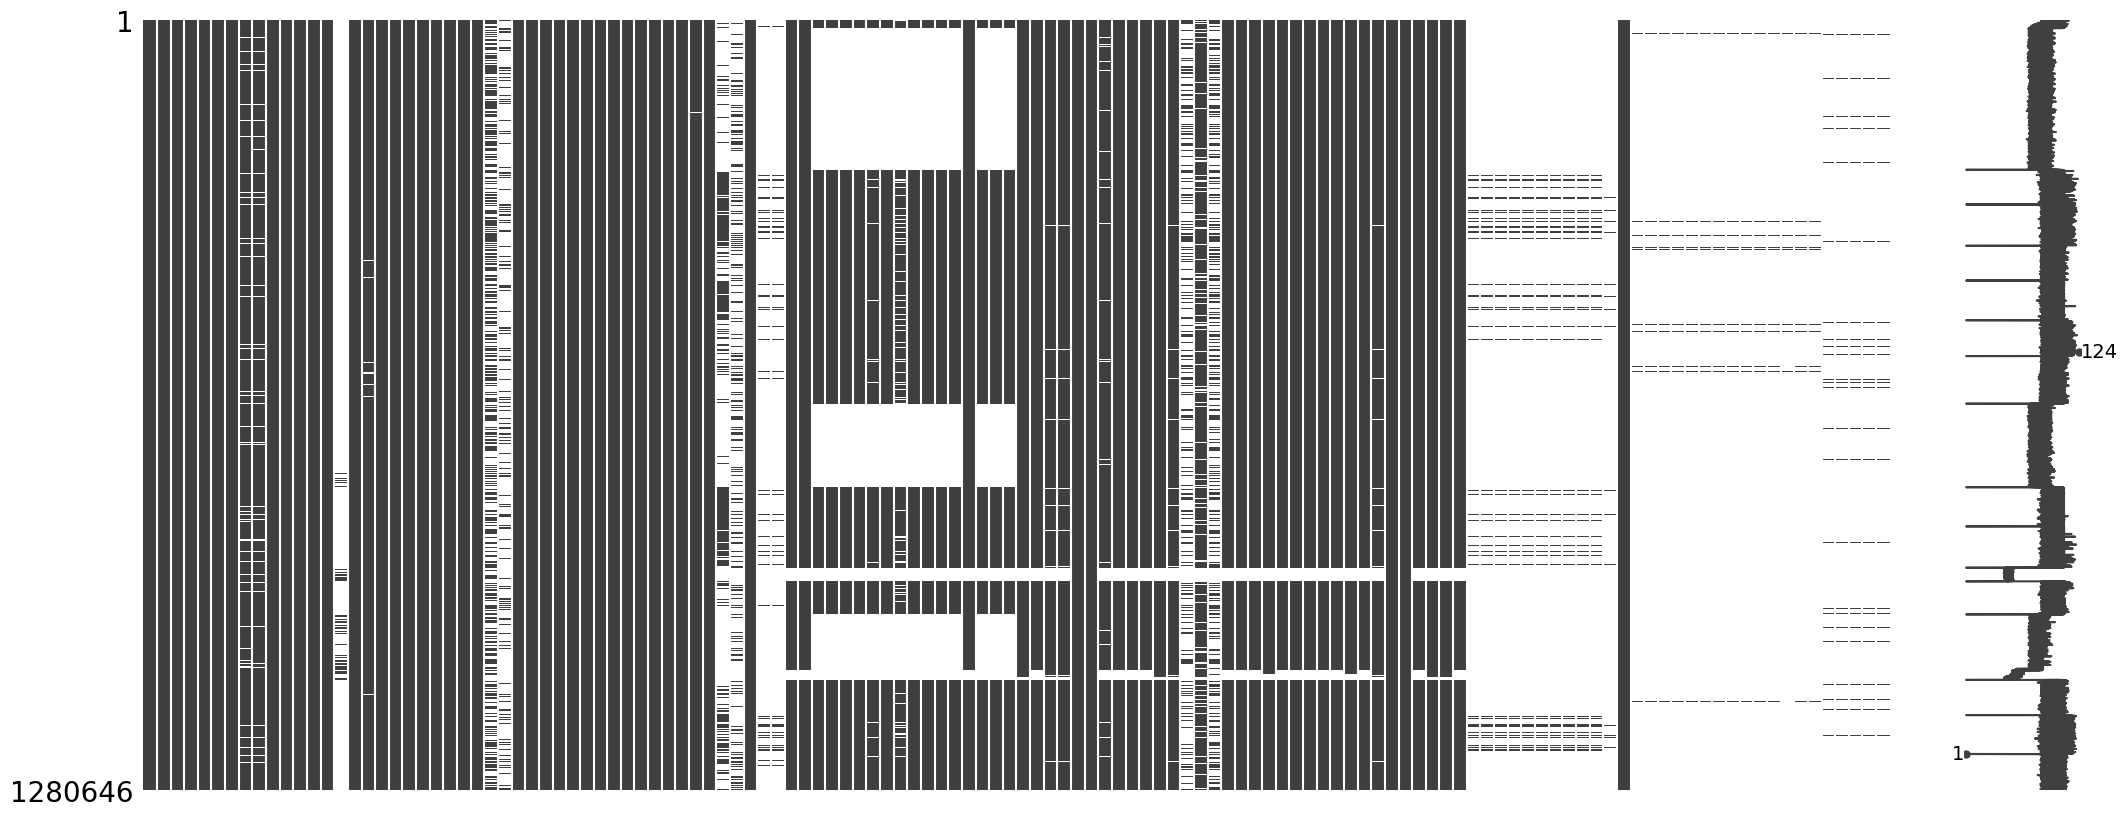

In [7]:
msno.matrix(df)

A systematic missing values appear in the dataset, it can be observed by the missing value plot above. 
- Big chunk of the same variables are missing for about 40% records in the center of the plot
- A lot of fields were missing at the right handside of the plot.
- Small portion of records have only less than 30% variables filled up.

### Step 1.1 Removal of Performance Variables

The performance variables are the measurements of credit performance of the customers after approval of the loan. It has no use for a model that aims to improve the quality of loan by rejecting high PD applicants *BEFORE* they become a borrower.

In [8]:
drop_col_perform = [
    "collection_recovery_fee",
    "delinq_amnt",
    "issue_d",
    "last_pymnt_amnt",
    "last_pymnt_d",
    "mths_since_last_delinq",
    "mths_since_last_major_derog",
    "next_pymnt_d",
    "pymnt_plan",
    "recoveries",
    "hardship_flag",
    "hardship_type",
    "hardship_reason",
    "hardship_status",
    "deferral_term",
    "hardship_amount",
    "hardship_start_date",
    "hardship_end_date",
    "payment_plan_start_date",
    "hardship_length",
    "hardship_dpd",
    "hardship_loan_status",
    "orig_projected_additional_accrued_interest",
    "hardship_payoff_balance_amount",
    "hardship_last_payment_amount",
    "settlement_status",
    "settlement_date",
    "settlement_amount",
    "settlement_percentage",
    "settlement_term",
    "int_rate",
    "total_pymnt",
    "total_rec_int",
    "total_rec_late_fee",
    "total_rec_prncp",
    "total_rev_hi_lim",
    "out_prncp",
    "out_prncp_inv",
]
df=df.drop(columns=drop_col_perform,axis=1)

### Step 1.2 Removal of Invalid Lines

In [9]:
crash_record_index = df[df.loan_amnt.isna()].index
crash_record = df.loc[crash_record_index, "id"]
crash_record = pd.DataFrame(data={'index':crash_record_index, 'id': crash_record})
df.drop(index=crash_record_index, inplace=True)

In [10]:
crash_record

index                                                id
249132    249132  Total amount funded in policy code 1: 6417608175
249133    249133  Total amount funded in policy code 2: 1944088810
306799    306799  Total amount funded in policy code 1: 1741781700
306800    306800   Total amount funded in policy code 2: 564202131
375539    375539  Total amount funded in policy code 1: 1791201400
375540    375540   Total amount funded in policy code 2: 651669342
433289    433289  Total amount funded in policy code 1: 1443412975
433290    433290   Total amount funded in policy code 2: 511988838
499321    499321  Total amount funded in policy code 1: 2063142975
499322    499322   Total amount funded in policy code 2: 823319310
558938    558938  Total amount funded in policy code 1: 1538432075
558939    558939   Total amount funded in policy code 2: 608903141
638173    638173  Total amount funded in policy code 1: 2087217200
638174    638174   Total amount funded in policy code 2: 662815446
777043    777043  Total amount funded in policy code 1: 3503840175
777044    777044   Total amount funded in policy code 2: 873652739
842178    842178  Total amount funded in policy code 1: 2050909275
842179    842179   Total amount funded in policy code 2: 820109297
910991    910991  Total amount funded in policy code 1: 2080429200
910992    910992   Total amount funded in policy code 2: 737901574
933608    933608          Loans that do not meet the credit policy
933609    933609   Total amount funded in policy code 1: 460296150
933610    933610           Total amount funded in policy code 2: 0
988519    988519  Total amount funded in policy code 1: 1437969475
988520    988520   Total amount funded in policy code 2: 520780182
1097521  1097521  Total amount funded in policy code 1: 2700702175
1097522  1097522    Total amount funded in policy code 2: 81866225
1156061  1156061  Total amount funded in policy code 1: 1404586950
1156062  1156062   Total amount funded in policy code 2: 567447023
1220767  1220767  Total amount funded in policy code 1: 1817354125
1220768  1220768   Total amount funded in policy code 2: 620899600

### Step 1.3 Removal of Identifier, Prohibited Demographic, Unstructured Variables

Remove of discriminating fields even though they could be strong predictors in the model.

In [11]:
non_analytical_columns = [
    "id",
    "desc",
    "title",
    "zip_code",
    "addr_state",
    "emp_title"
]
df.drop(columns=non_analytical_columns, axis=1, inplace=True)

### Step 1.4 Systematic Loss of Data - Potential Unsecure Loans

There are a range of record with credit history missing. The default rate shows a significant difference systematically.

In [12]:
unsecure_loan_index = df[
    df.all_util.isna() &
    df.il_util.isna() &
    df.inq_fi.isna() &
    df.inq_last_12m.isna() &
    df.max_bal_bc.isna() &
    df.mths_since_rcnt_il.isna() &
    df.open_acc_6m.isna() &
    df.open_act_il.isna() &
    df.open_il_12m.isna() &
    df.open_il_24m.isna() &
    df.open_rv_12m.isna() &
    df.open_rv_24m.isna() &
    df.total_bal_il.isna() &
    df.total_cu_tl.isna()
].index
df["unsecure_flag"] = False
df.loc[unsecure_loan_index, "unsecure_flag"] = True

In [13]:
print(f"Overall bad loans (Charged-off/Default) ratios: {get_bad_ratio(df)}")
print(f"Potential Unsecure Loans bad loans (Charged-off/Default) ratios: {get_bad_ratio(df[df.unsecure_flag])}")

Overall bad loans (Charged-off/Default) ratios: 0.20974219418014
Potential Unsecure Loans bad loans (Charged-off/Default) ratios: 0.29282931784337124


In [14]:
df.drop(columns=[
    "all_util",
    "il_util",
    "inq_fi",
    "inq_last_12m",
    "max_bal_bc",
    "mths_since_rcnt_il",
    "open_acc_6m",
    "open_act_il",
    "open_il_12m",
    "open_il_24m",
    "open_rv_12m",
    "open_rv_24m",
    "total_bal_il",
    "total_cu_tl"
], axis=1, inplace=True)

### Step 1.5 Systematic Loss of Data - Joint Application

Missing joint applicant data means there are no secondary applicant to back the loan application. The PD is significantly lower if there is a secondary applicant.

In [15]:
print(f"Overall bad loans (Charged-off/Default) ratios: {get_bad_ratio(df)}")
print(f"Potential Unsecure Loans bad loans (Charged-off/Default) ratios: {get_bad_ratio(df[df.application_type=='Joint App'])}")

Overall bad loans (Charged-off/Default) ratios: 0.20974219418014
Potential Unsecure Loans bad loans (Charged-off/Default) ratios: 0.09695248564797851


In [16]:
df.drop(columns=[
    "annual_inc_joint",
    "dti_joint",
    "revol_bal_joint",
    "sec_app_chargeoff_within_12_mths",
    "sec_app_collections_12_mths_ex_med",
    "sec_app_earliest_cr_line",
    "sec_app_inq_last_6mths",
    "sec_app_mort_acc",
    "sec_app_mths_since_last_major_derog",
    "sec_app_num_rev_accts",
    "sec_app_open_acc",
    "sec_app_open_act_il",
    "sec_app_revol_util"
], axis=1, inplace=True)

### Step 1.6 Low Percentage of Non-zero Values

Some fields are having too many zeros (95% +), making it unusable for the model. Also there are no implication to PD in business sense. We could drop them to minimize the model size to save computational effort later.

In [17]:
print(f"Proportion of '0' values in tax_liens: {sum(df.tax_liens == 0)/len(df)}")
print(f"Proportion of '0' values in chargeoff_within_12_mths: {sum(df.chargeoff_within_12_mths == 0)/len(df)}")


Proportion of '0' values in tax_liens: 0.9702096258438329
Proportion of '0' values in chargeoff_within_12_mths: 0.992217801603136


In [18]:
df.drop(columns=[
    "tax_liens",
    "chargeoff_within_12_mths"]
    , axis=1, inplace=True)

# Step 1 Results

<AxesSubplot:>

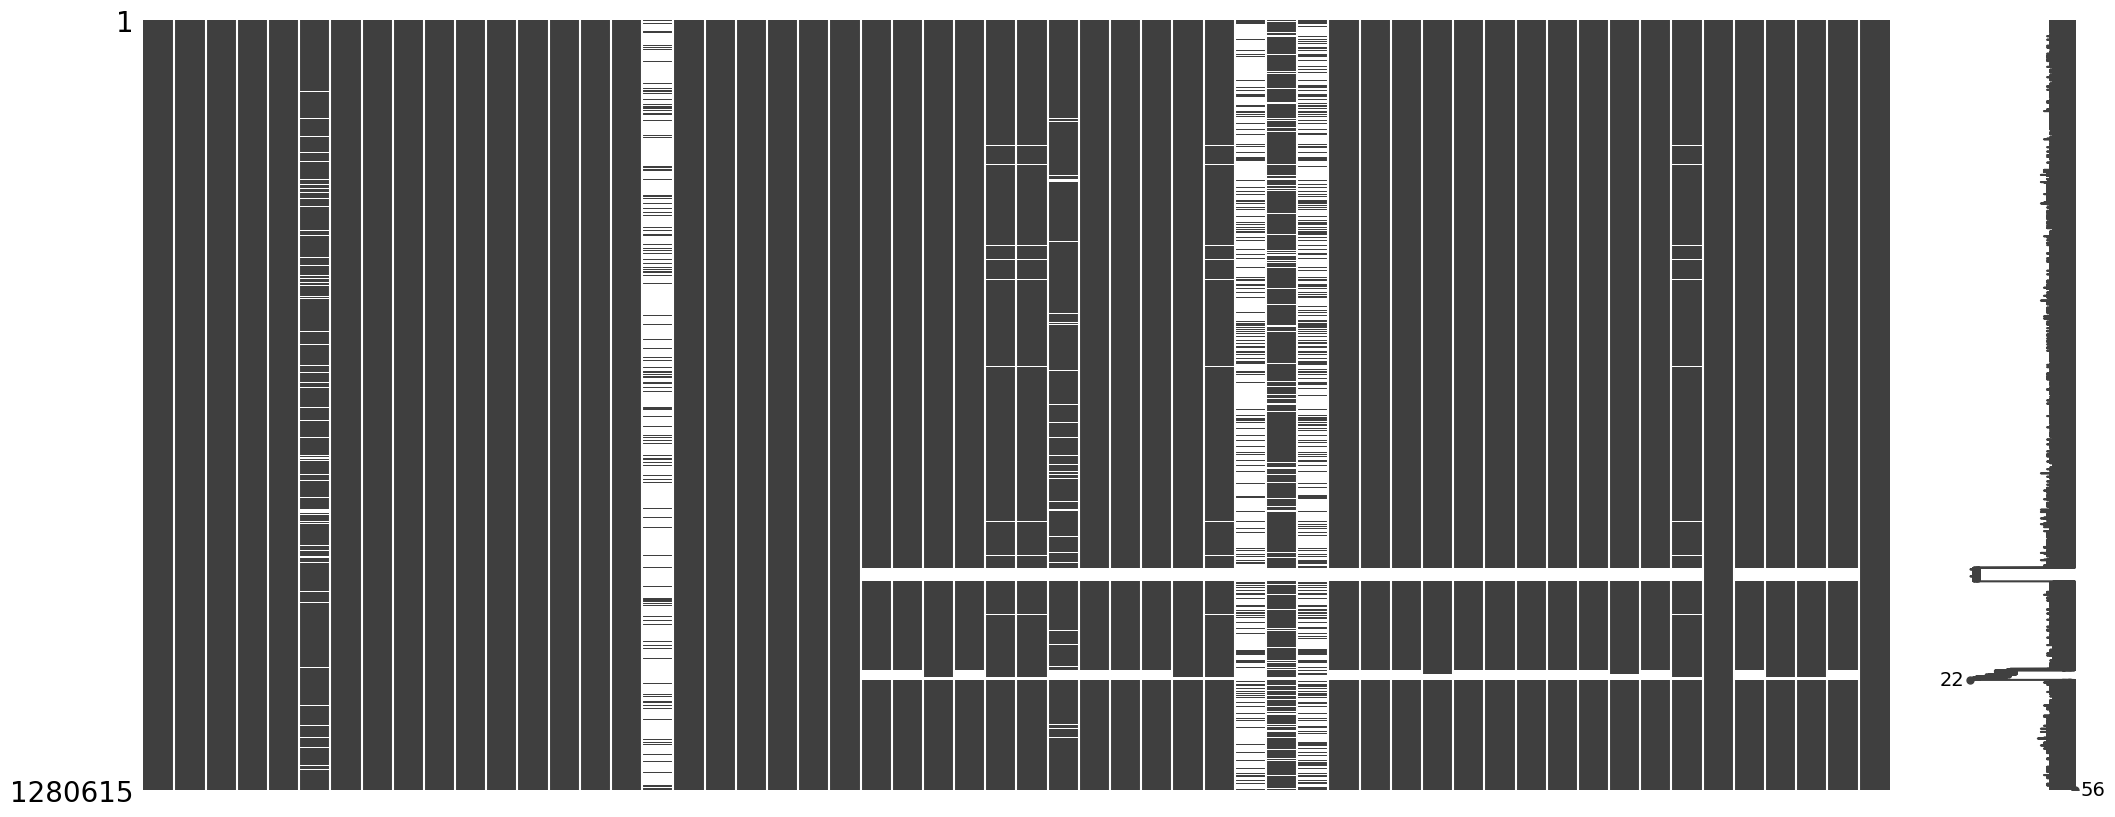

In [19]:
msno.matrix(df)

# Step 1 Completed

In [20]:
pickle.dump(df, open('Q1_Step1.pkl', 'wb'))

# Step 2: Data Type Encoding

For Random Forest and XGB Classifier in later process, some categorical data is having too many values which creates a lot of dummy variables and will drastically drag the performance. Perhaps encoding into simpler labels / changing data type could minimize the dummies variables without losing generality.

In [21]:
df = pickle.load(open('Q1_Step1.pkl', 'rb'))

### Encoding `earliest_cr_line` from text to year

In [22]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"]).dt.year

### Encoding `emp_length` from categorical to numeric

In [23]:
emp_length_dict = {
    "10+ years": 10,
    "2 years": 2,
    "< 1 year": 0,
    "3 years": 3,
    "1 year": 1,
    "5 years": 5,
    "4 years": 4,
    "6 years": 6,
    "8 years": 8,
    "7 years": 7,
    "9 years": 9
}
for emp_leng in emp_length_dict:
    df.loc[df[df.emp_length == emp_leng].index, "emp_length"] = emp_length_dict[emp_leng]

### Encoding high percentage of missing `mths_since_recent_bc_dlg`

In [24]:
missing_index = df[df.mths_since_recent_bc_dlq.isna()].index
df.mths_since_recent_bc_dlq = True
df.loc[missing_index, "mths_since_recent_bc_dlq"] = False

### Encoding high percentage of missing `mths_since_recent_revol_delinq`

In [25]:
missing_index = df[df.mths_since_recent_revol_delinq.isna()].index
df.mths_since_recent_revol_delinq = True
df.loc[missing_index, "mths_since_recent_revol_delinq"] = False

### Encoding high percentage of missing `mths_since_last_record`

In [26]:
missing_index = df[df.mths_since_last_record.isna()].index
df.mths_since_last_record = True
df.loc[missing_index, "mths_since_last_record"] = False

### Encoding high percentage of zero `tot_coll_amt`

In [27]:
zero_index = df[df.tot_coll_amt==0].index
df.tot_coll_amt = True
df.loc[zero_index, "tot_coll_amt"] = False

<AxesSubplot:>

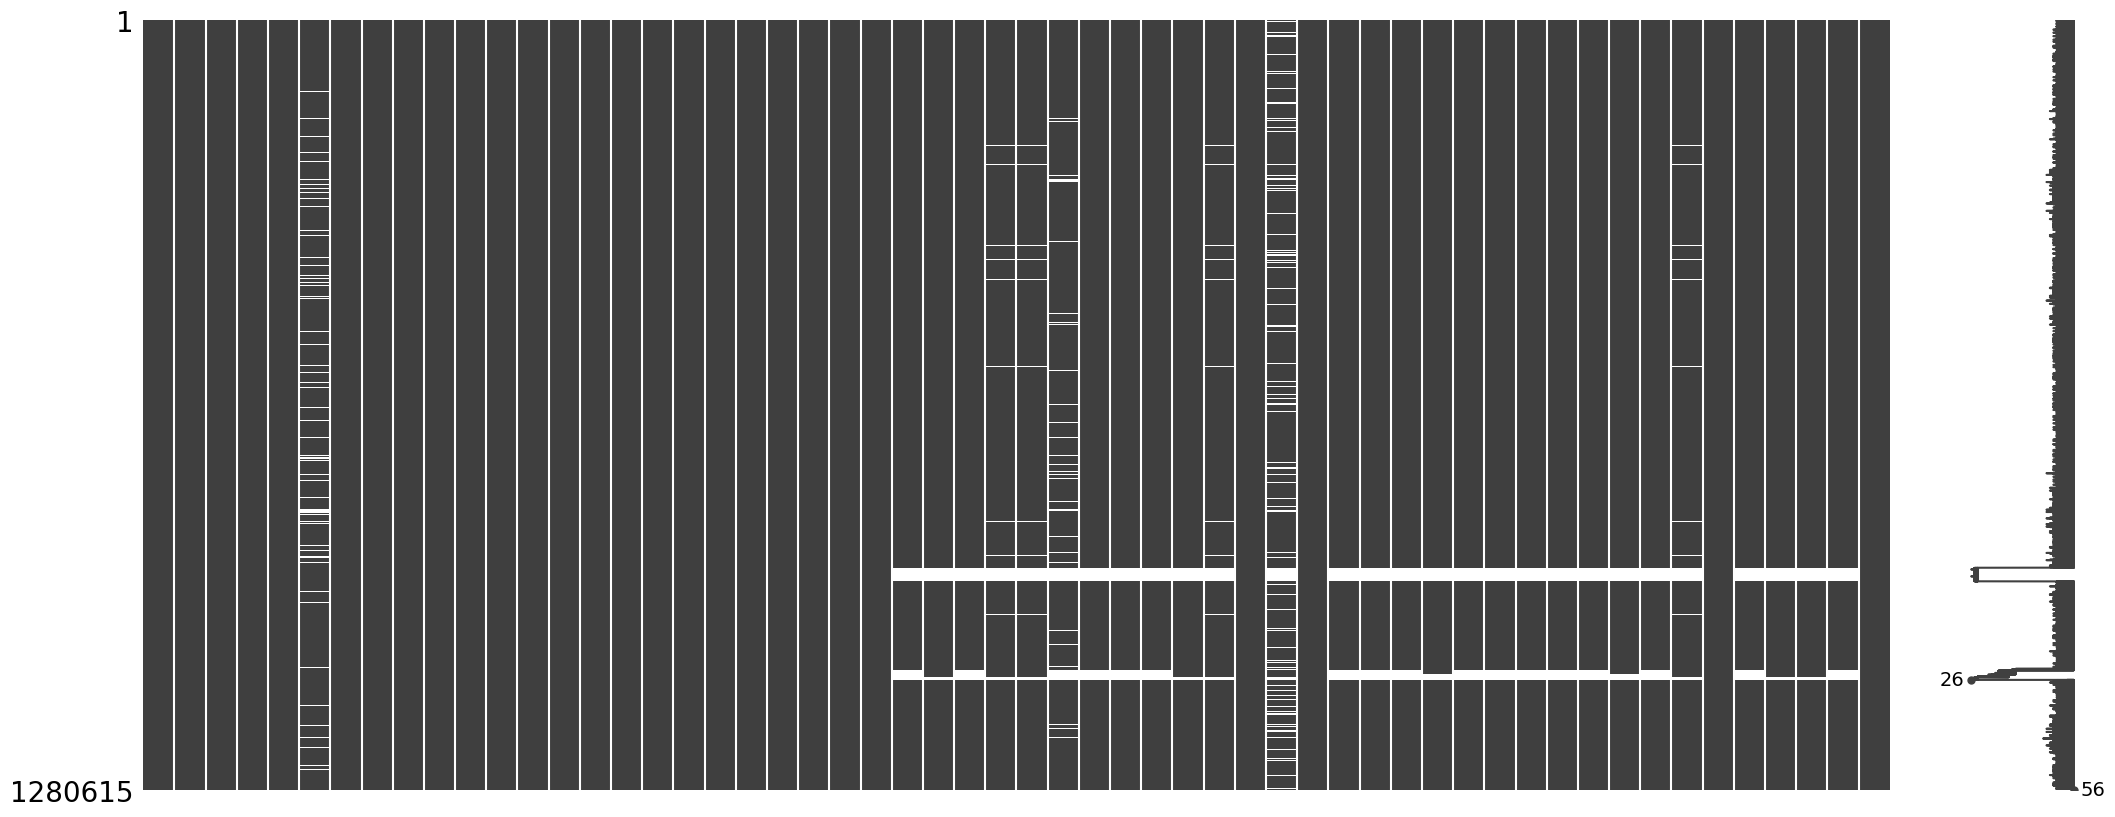

In [28]:
msno.matrix(df)

# Step 2 Completed

In [29]:
pickle.dump(df, open('Q1_Step2.pkl', 'wb'))

# Step 3 Outliers Treatment

The major outlier treatment would be truncate the values by 3 times of the standard deviation (99.7%). The process is a little bit tedious so we eyeball the variables to be truncated and then process them by batch.

Removing outlier record is the last resort as the business setting requires extremely strong jusrtifications for removing records from model (e.g. system error or faulty records). 

In [30]:
df = pickle.load(open('Q1_Step2.pkl', 'rb'))

In [31]:
numeric_col = df.select_dtypes([float, int]).columns
bad_loan_index = (df.loan_status == "Charged Off") | (df.loan_status == "Default")

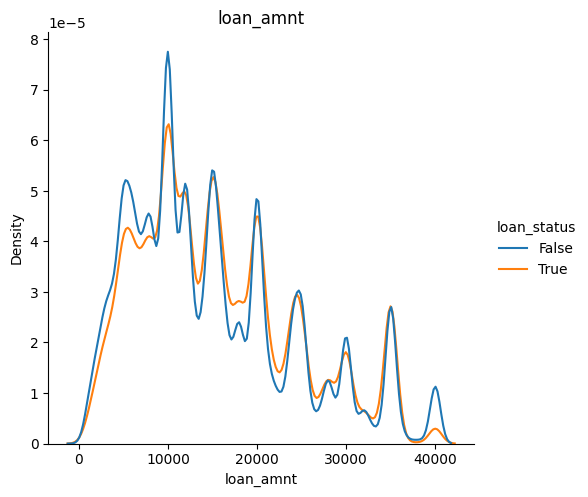

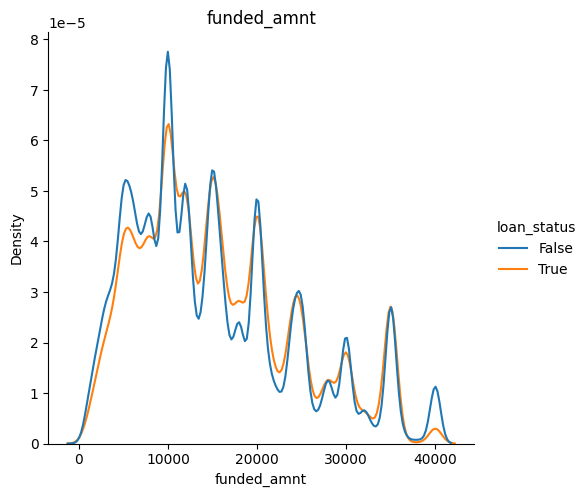

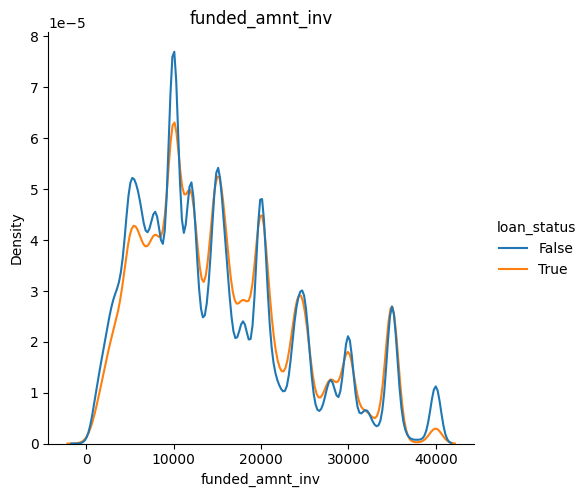

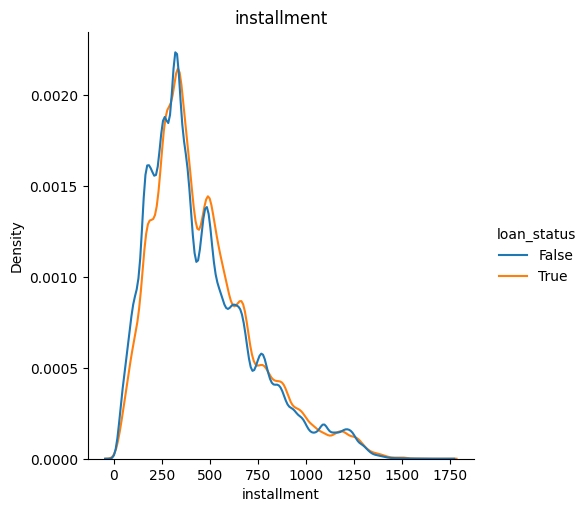

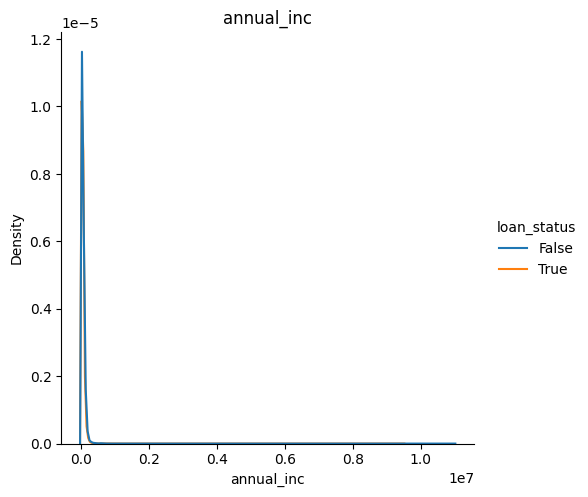

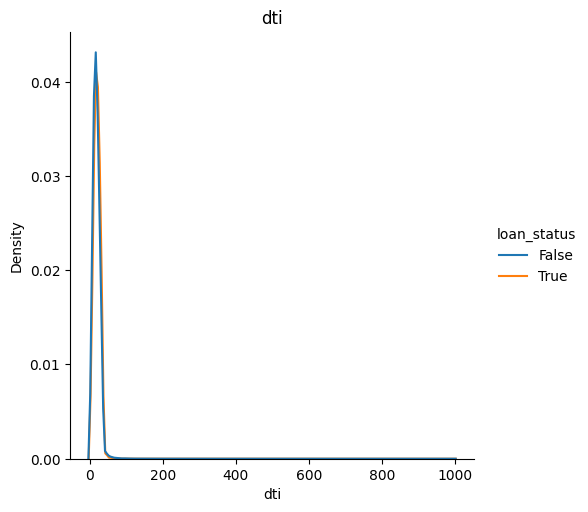

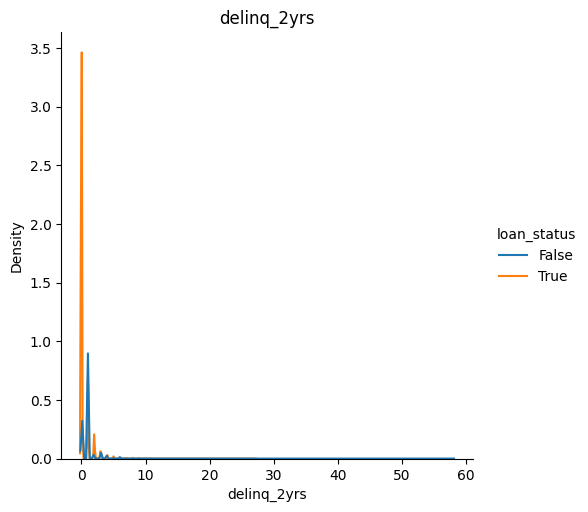

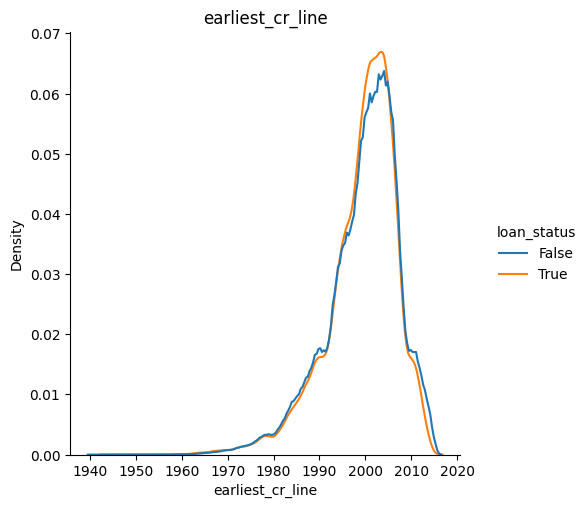

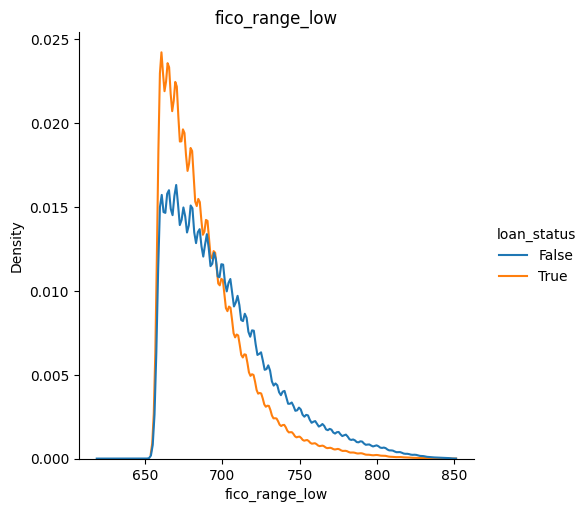

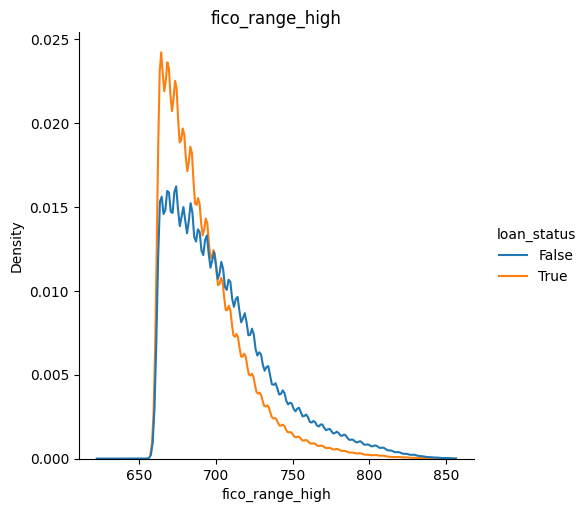

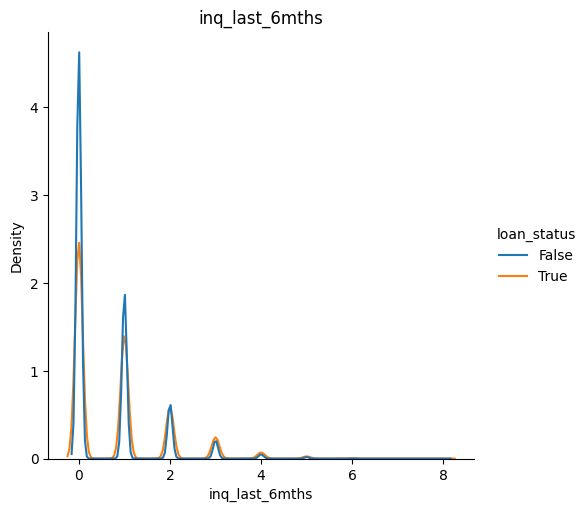

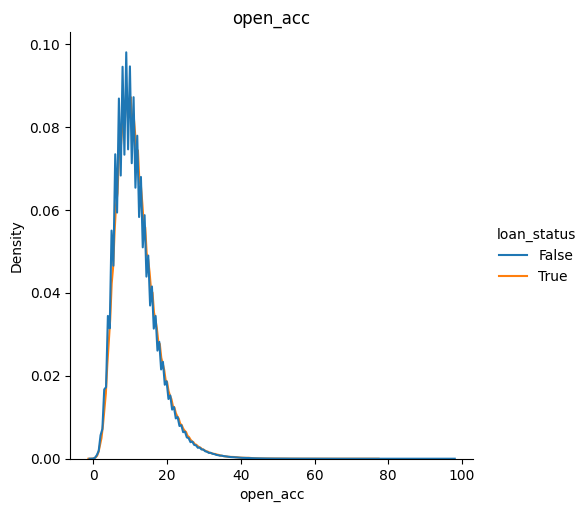

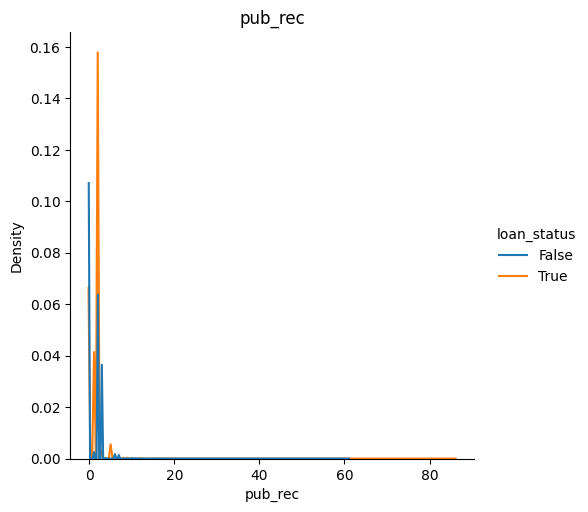

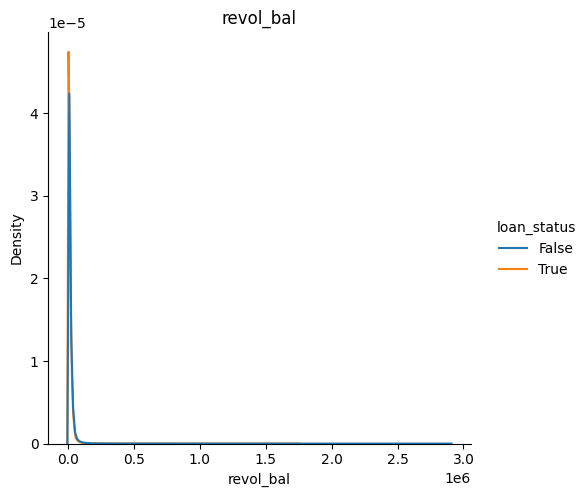

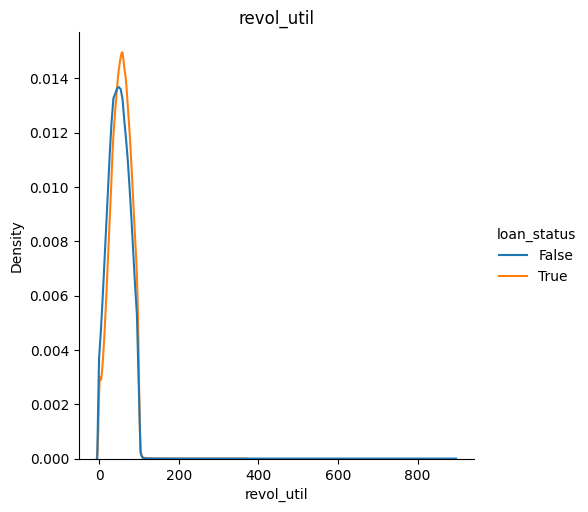

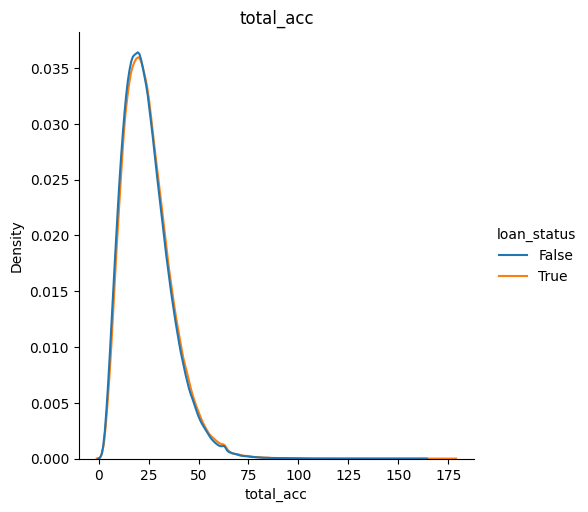

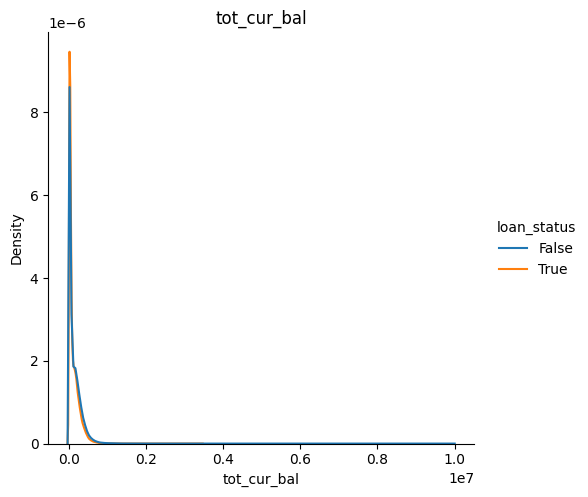

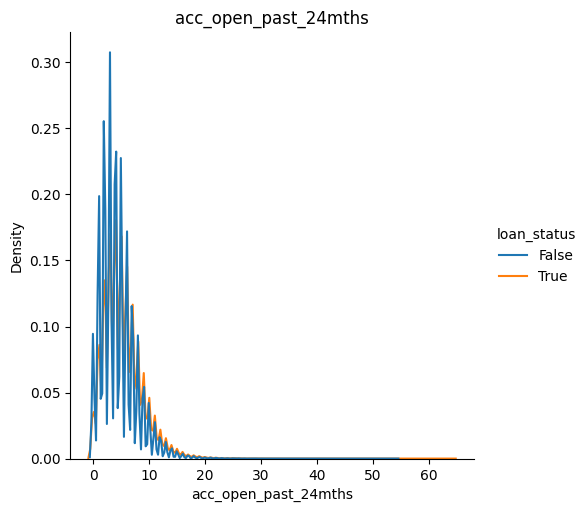

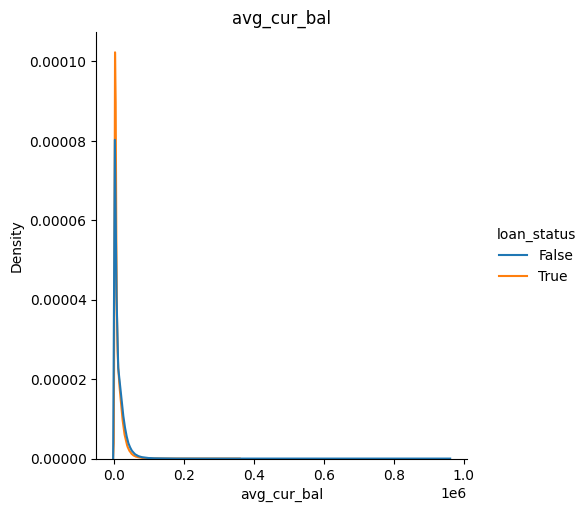

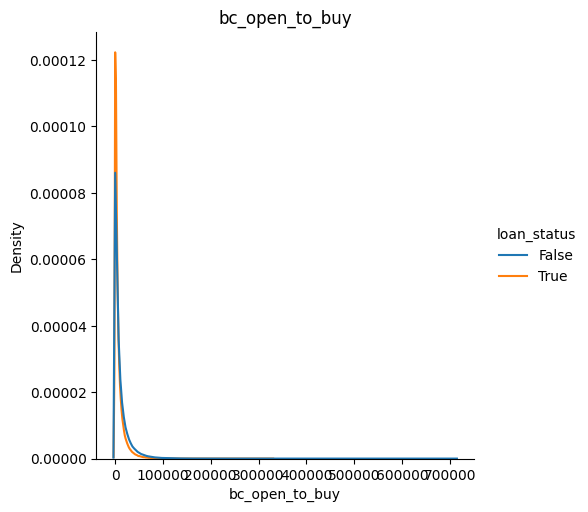

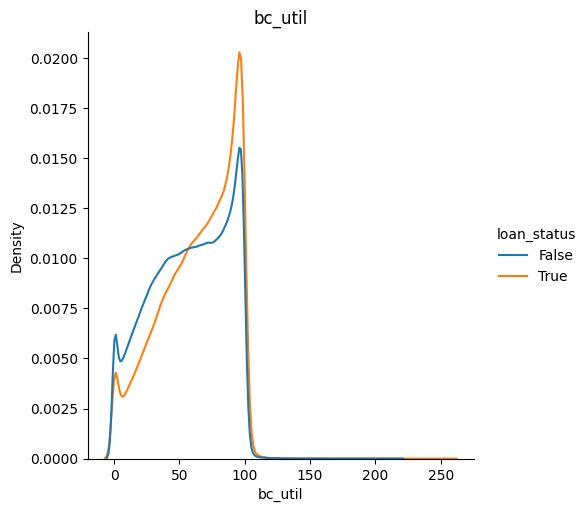

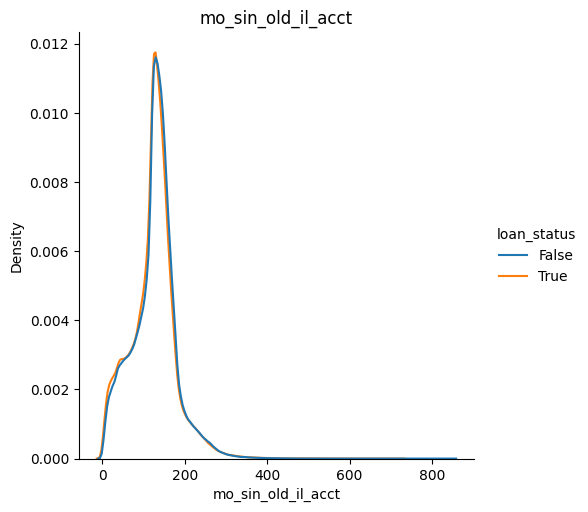

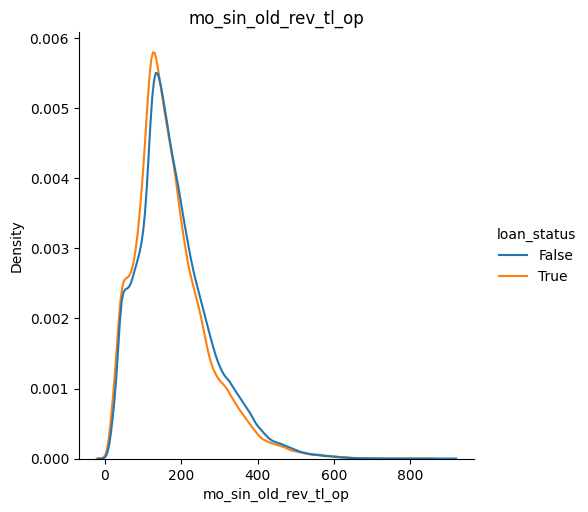

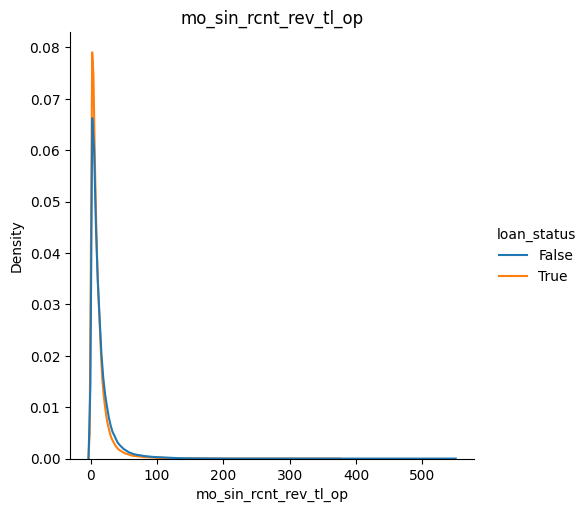

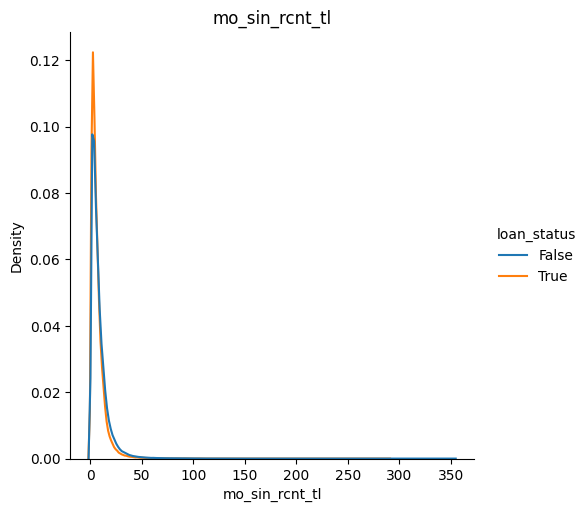

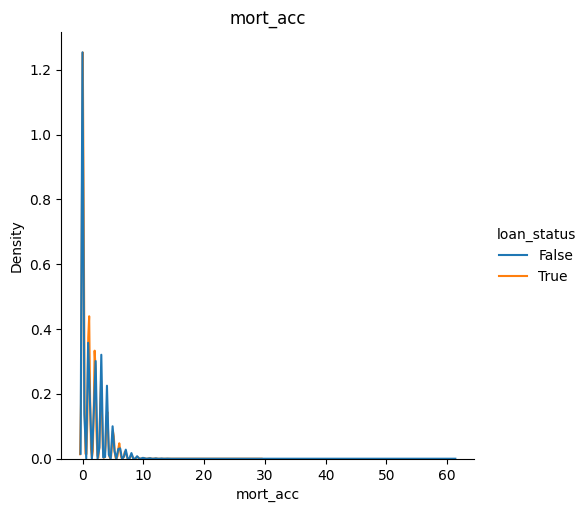

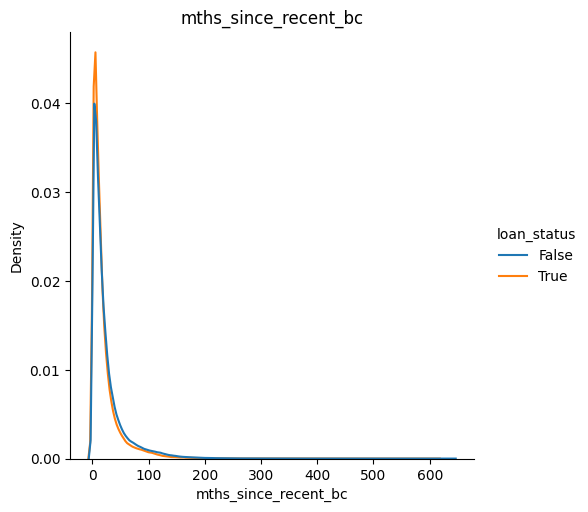

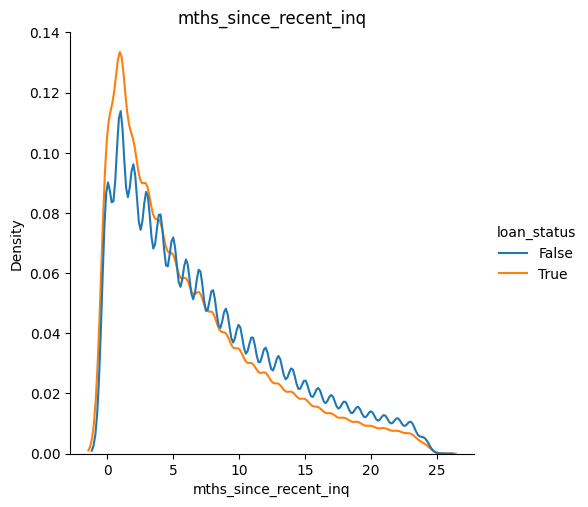

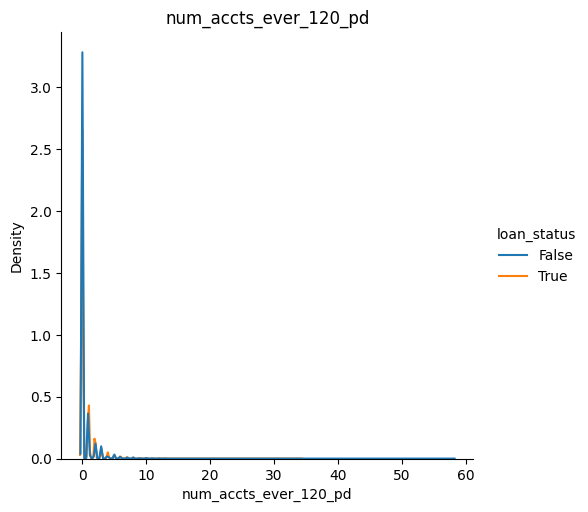

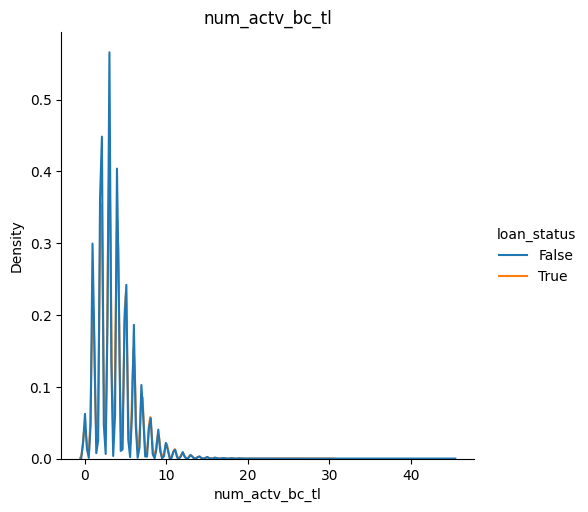

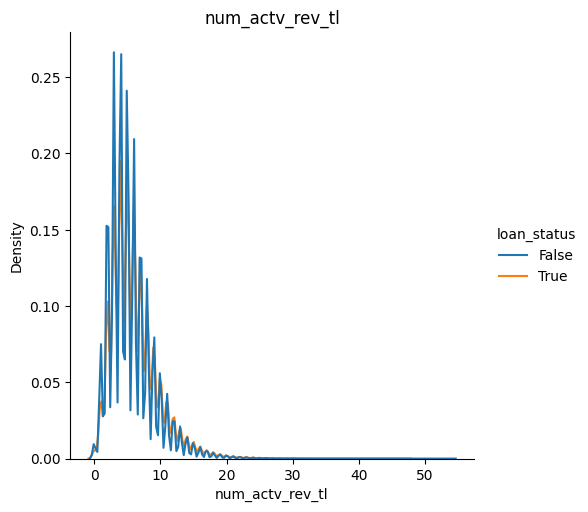

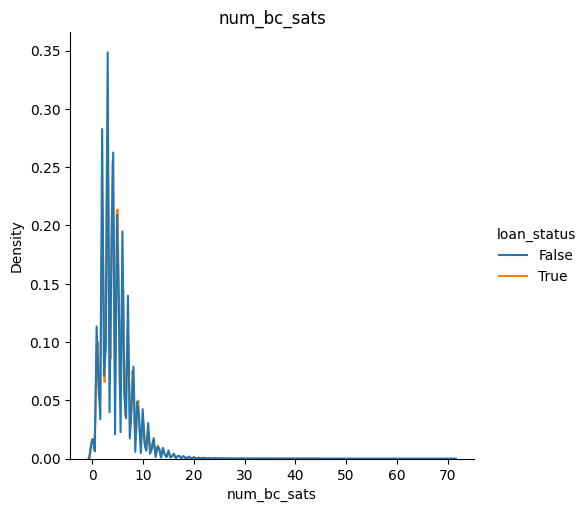

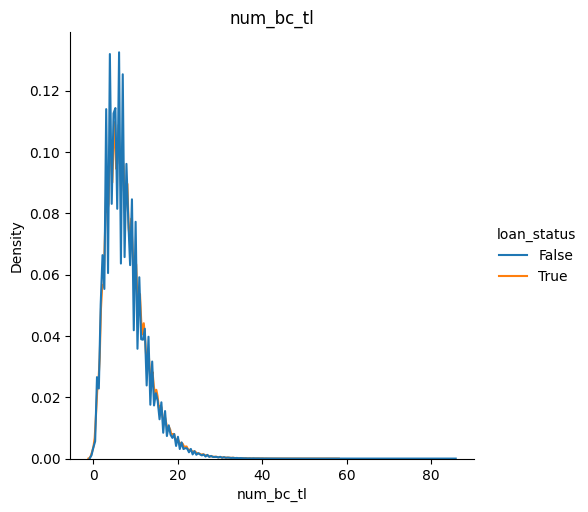

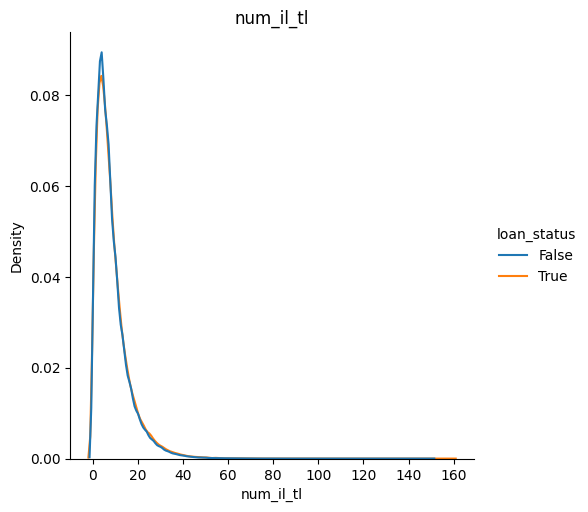

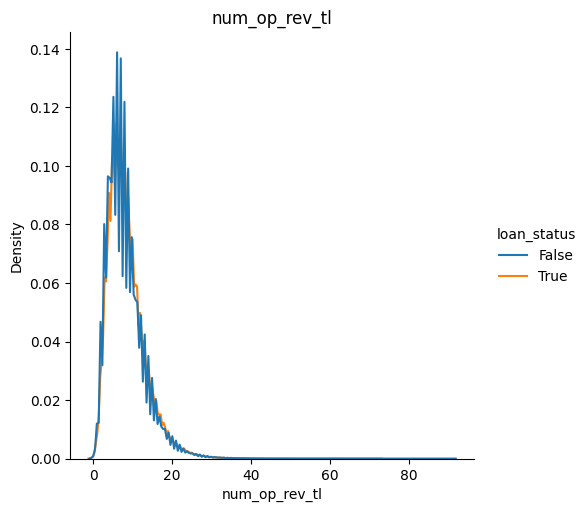

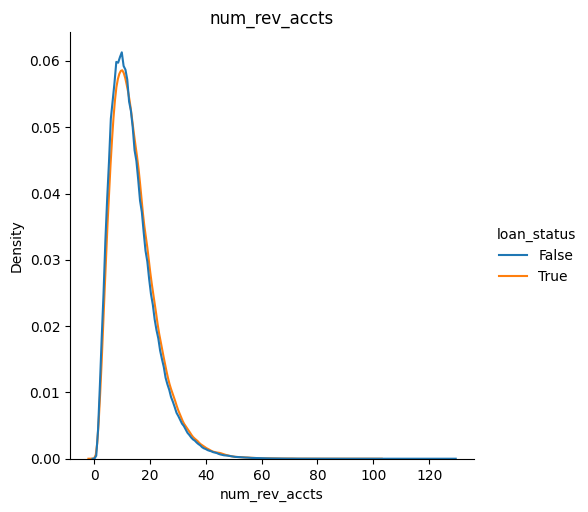

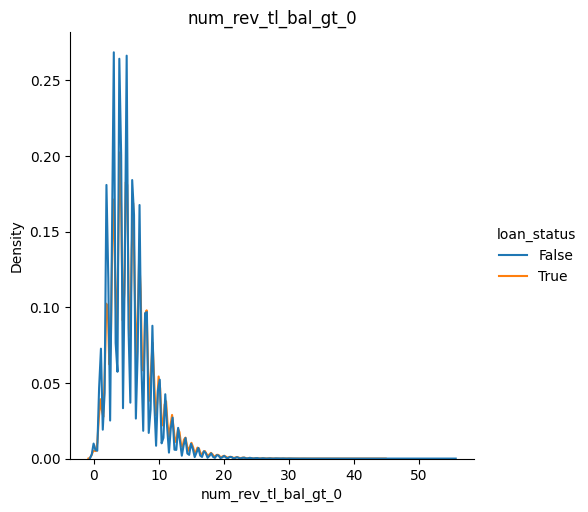

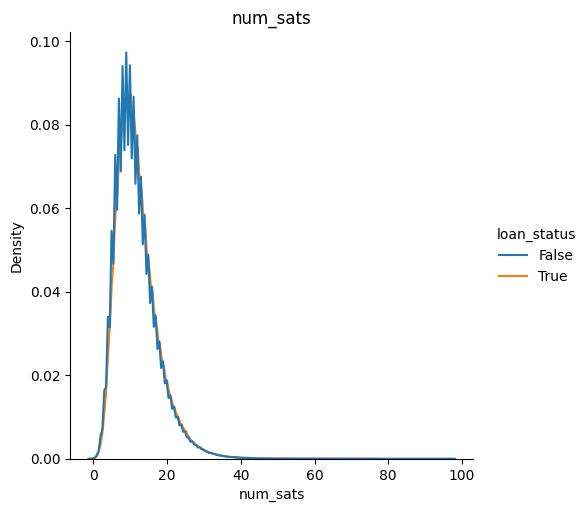

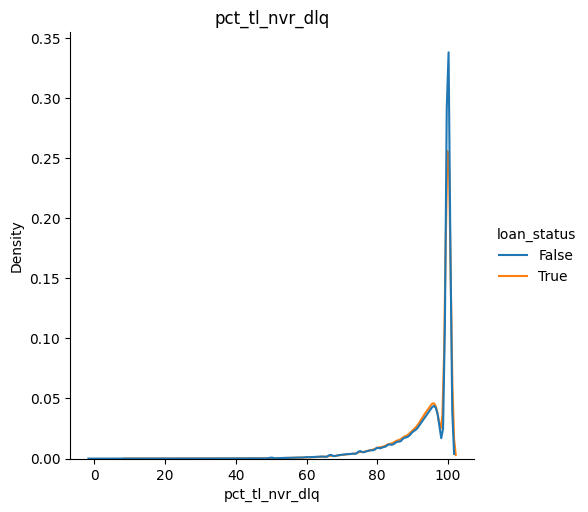

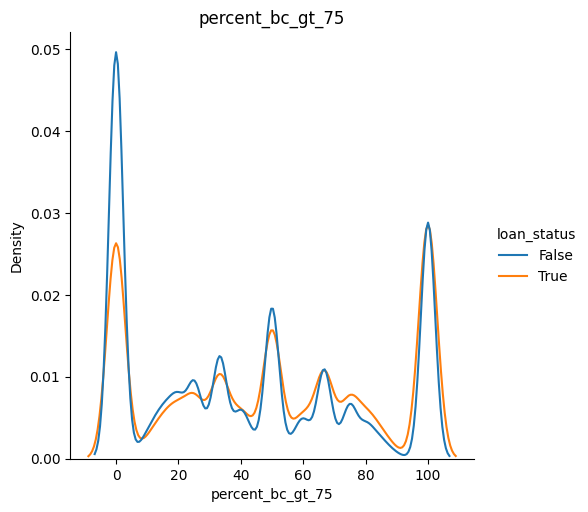

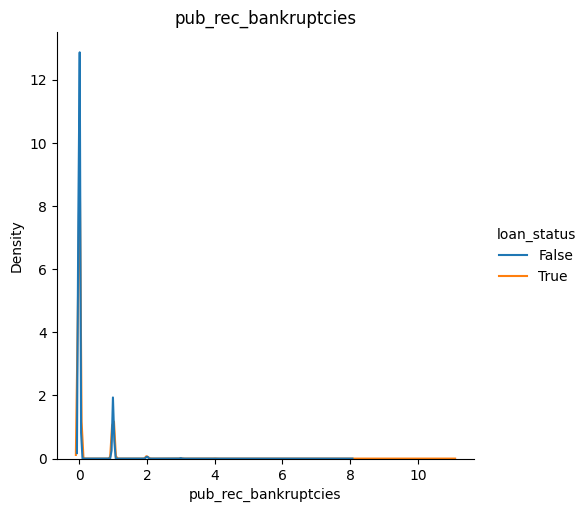

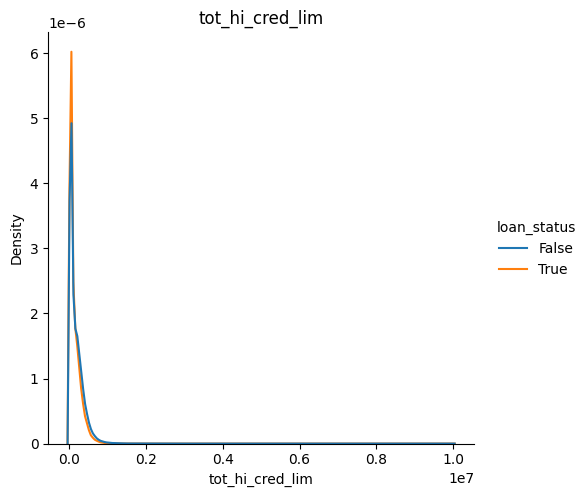

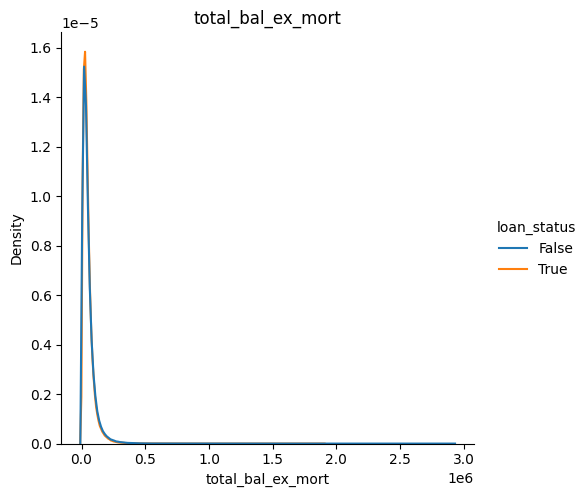

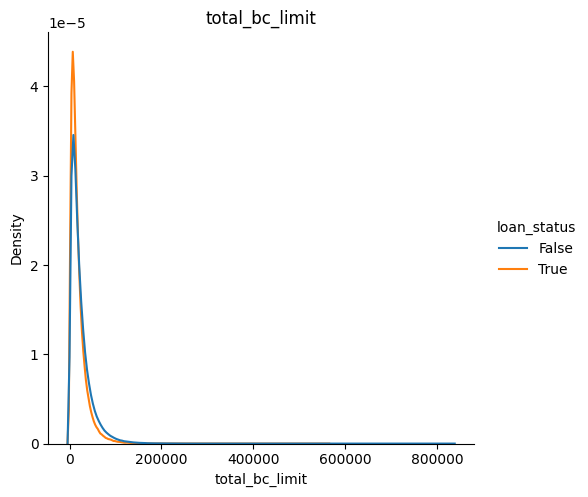

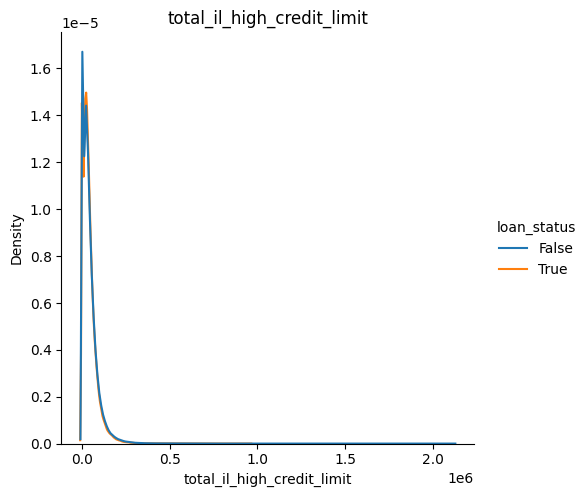

In [32]:
for colname in numeric_col:
    sns.displot(df, x=colname, hue=bad_loan_index, kind="kde", common_norm=False).set(title=colname)
    plt.show()

### Truncation

In [33]:
truncate_list = [
    'installment','annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line','fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

In [34]:
for candidate in truncate_list:
    df[candidate] = list_truncation(df[candidate])

### Check Results

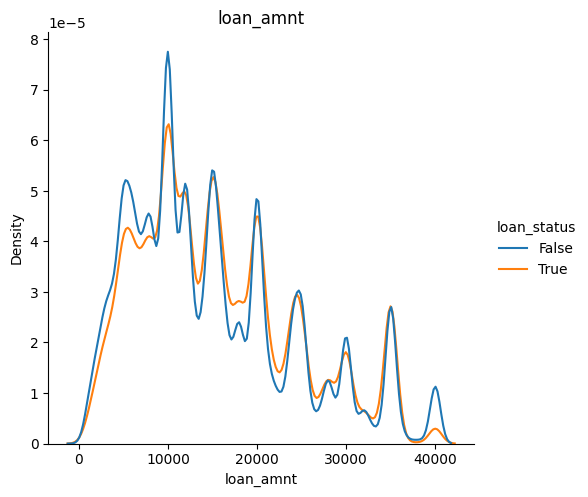

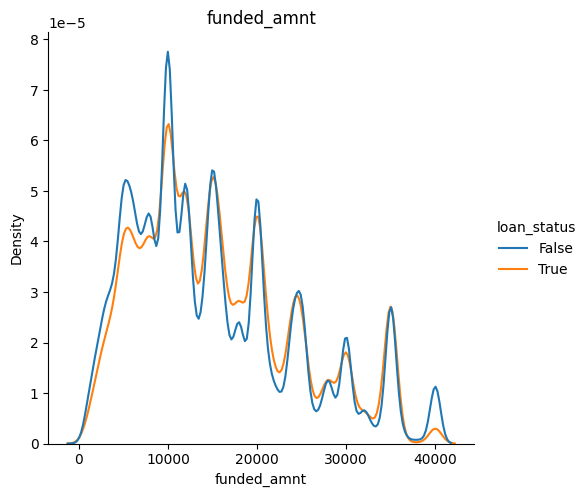

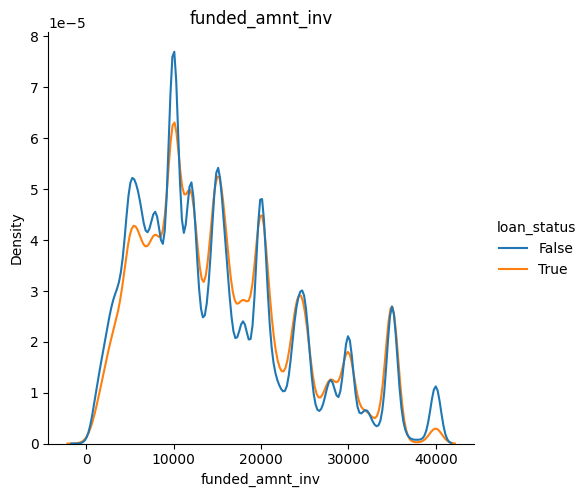

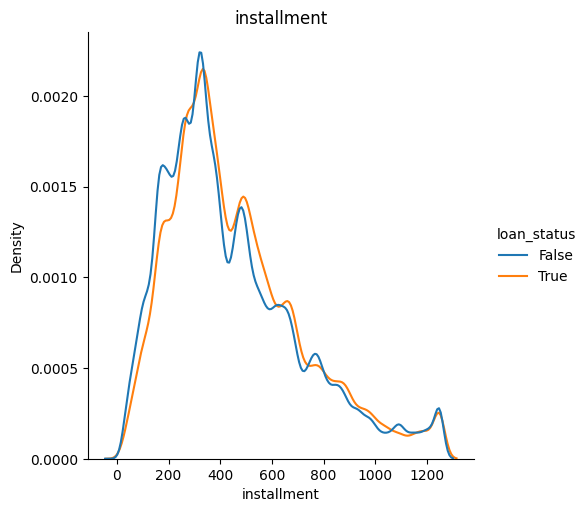

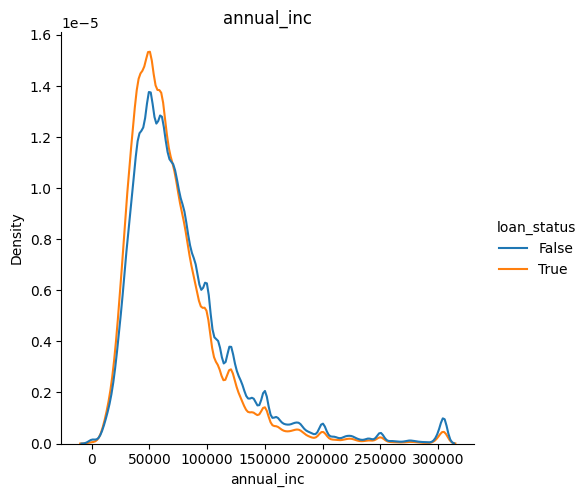

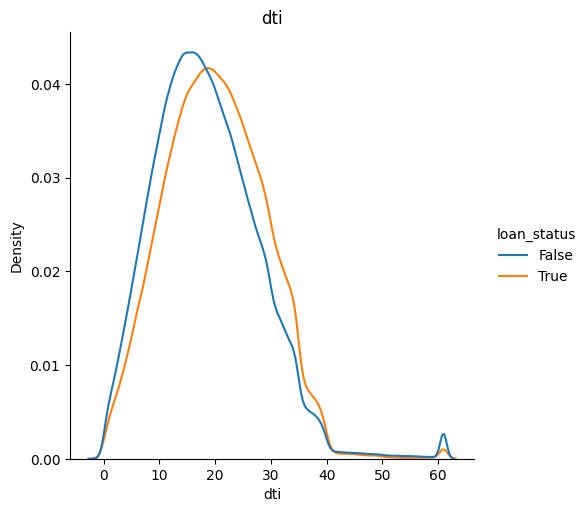

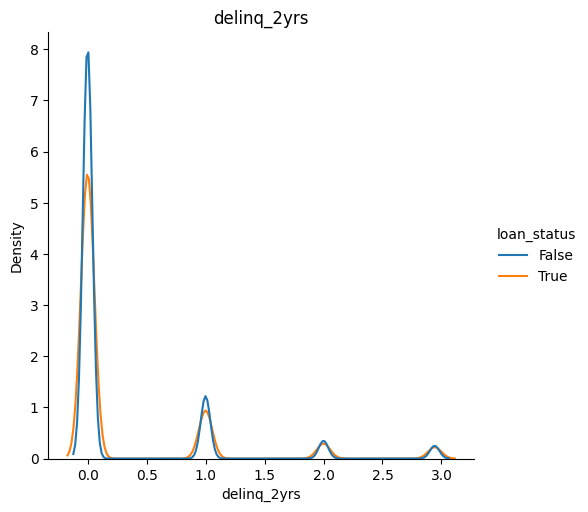

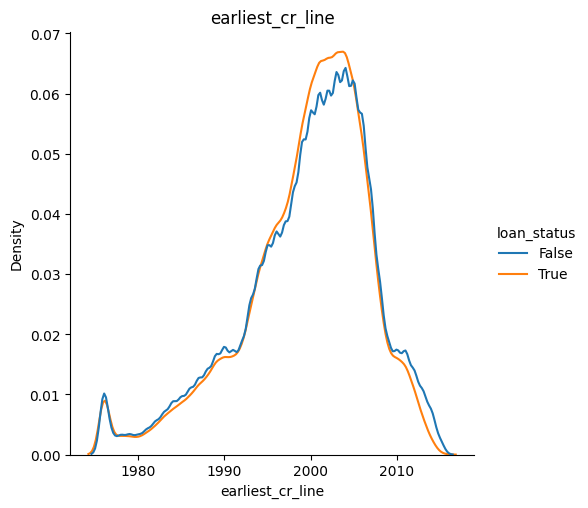

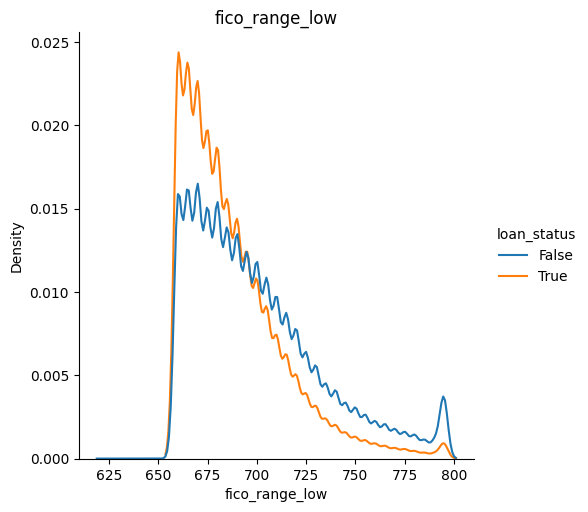

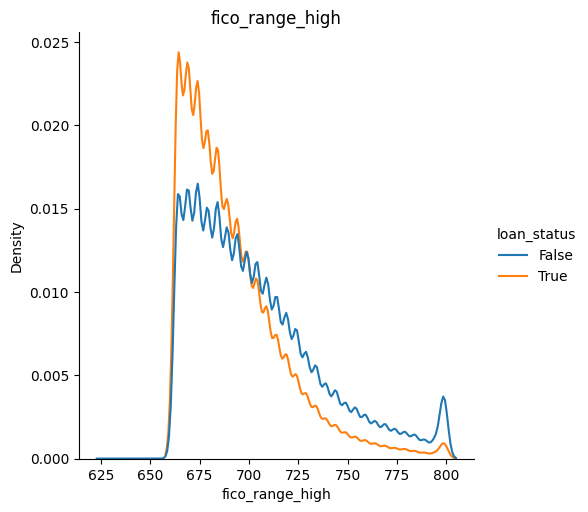

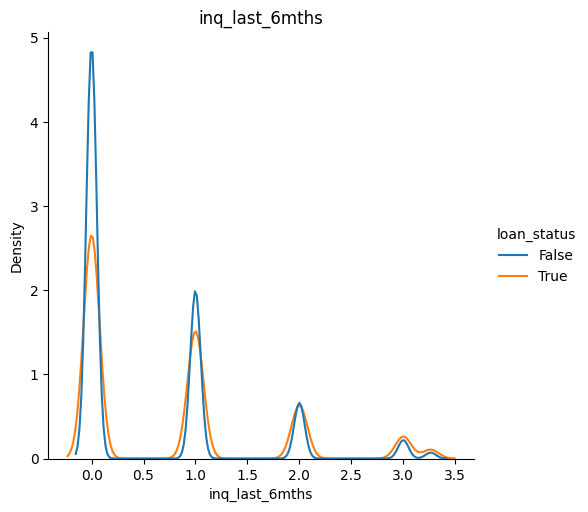

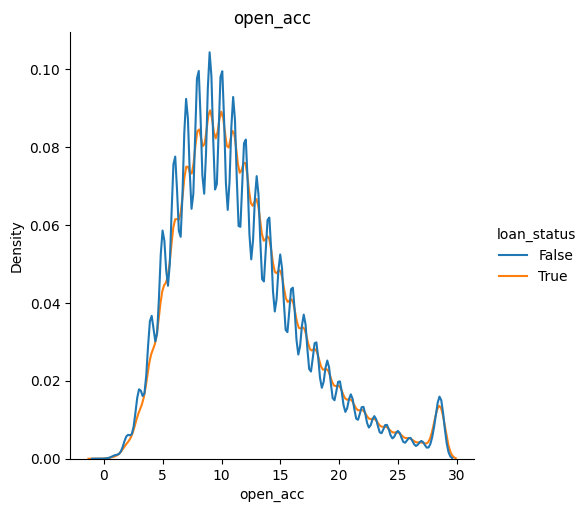

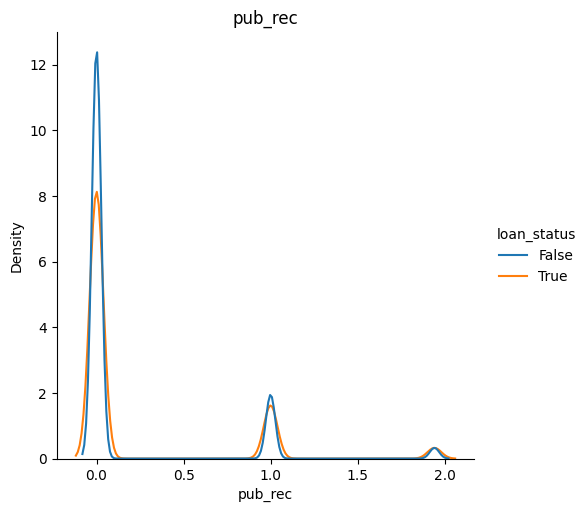

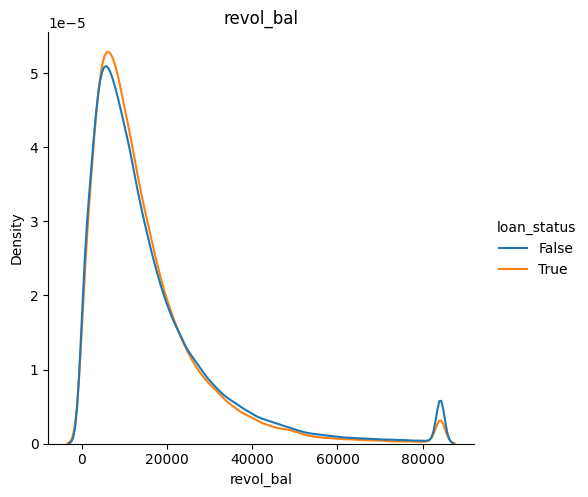

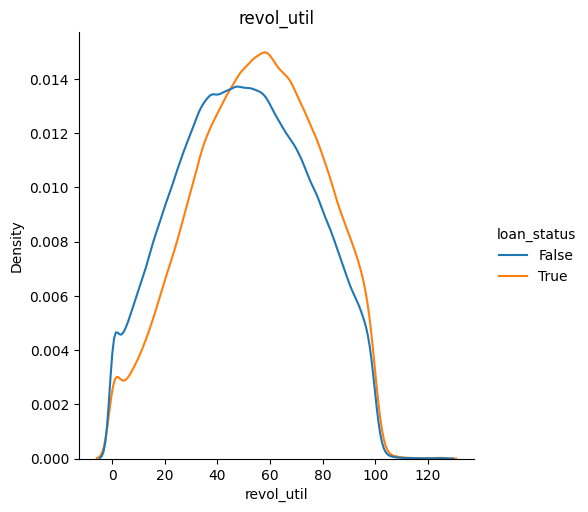

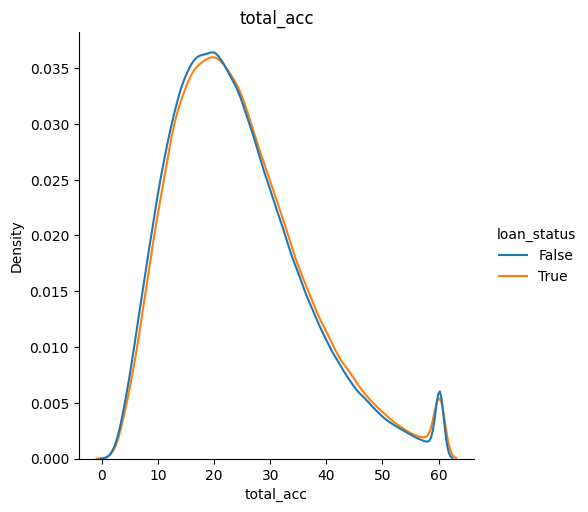

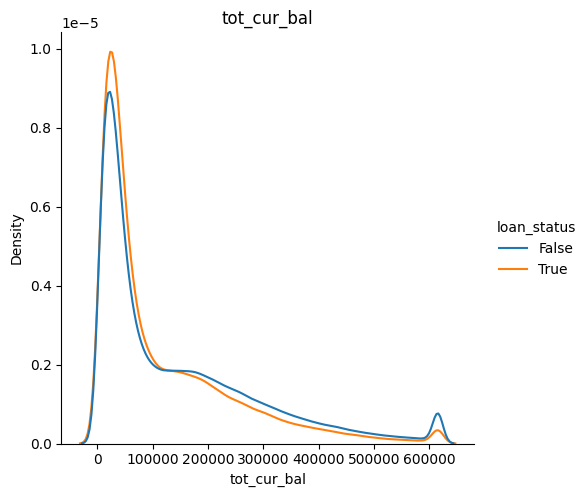

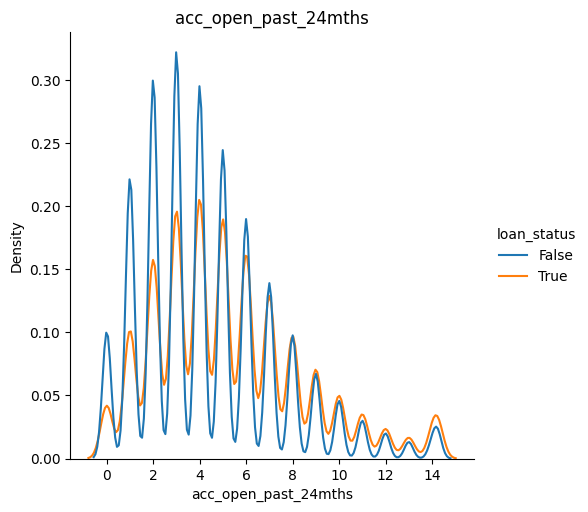

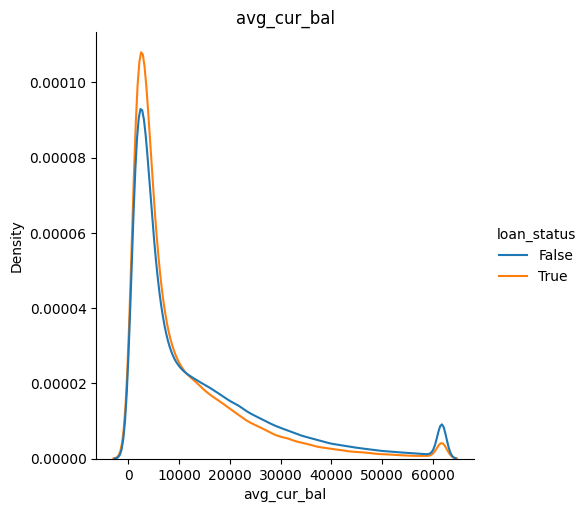

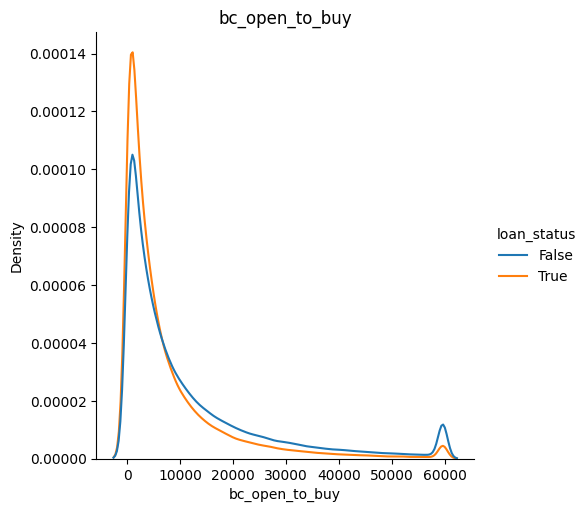

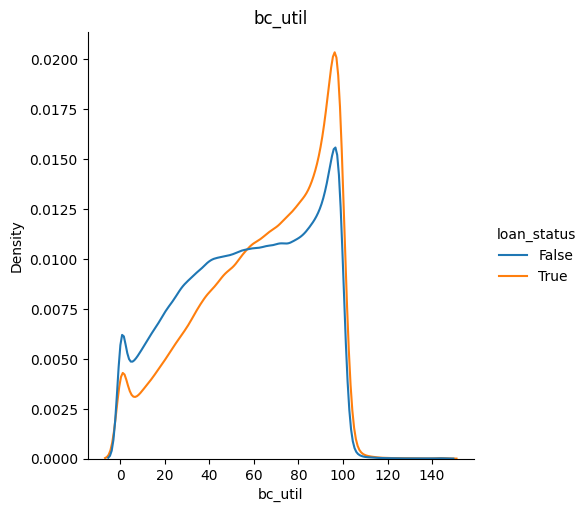

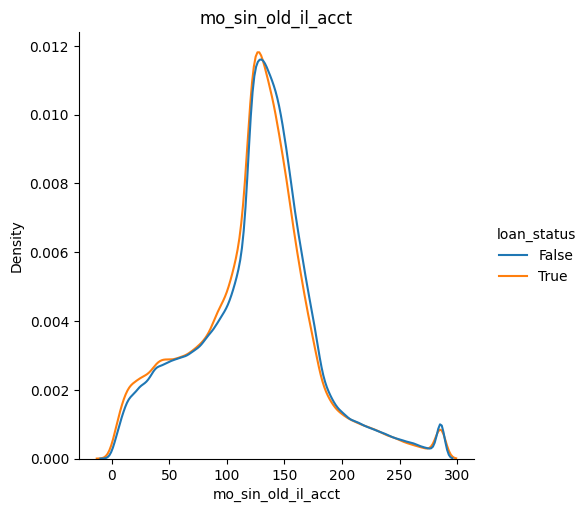

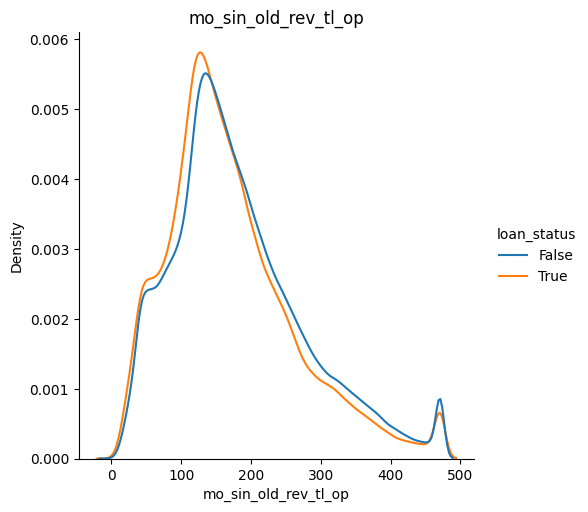

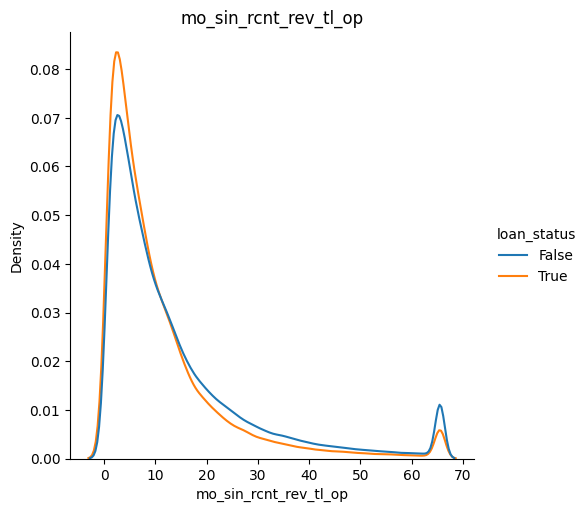

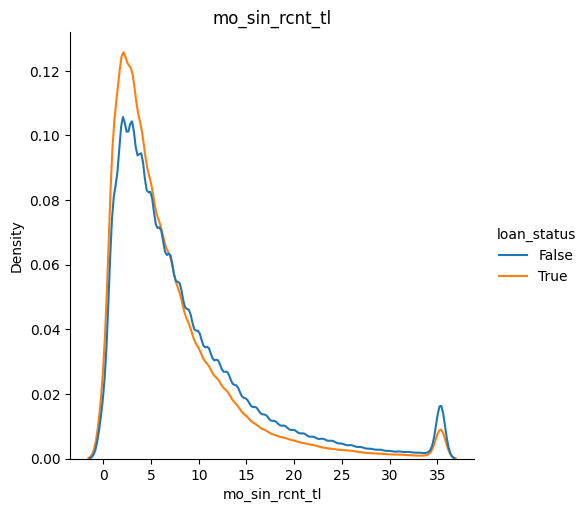

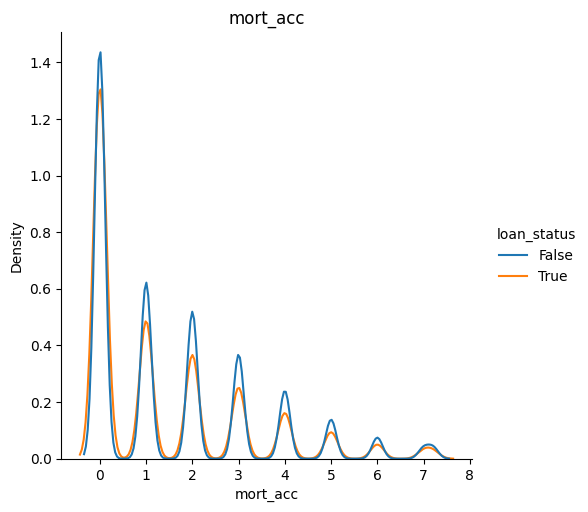

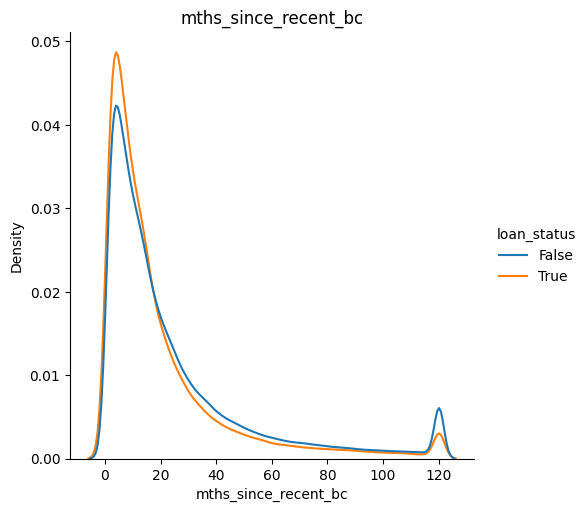

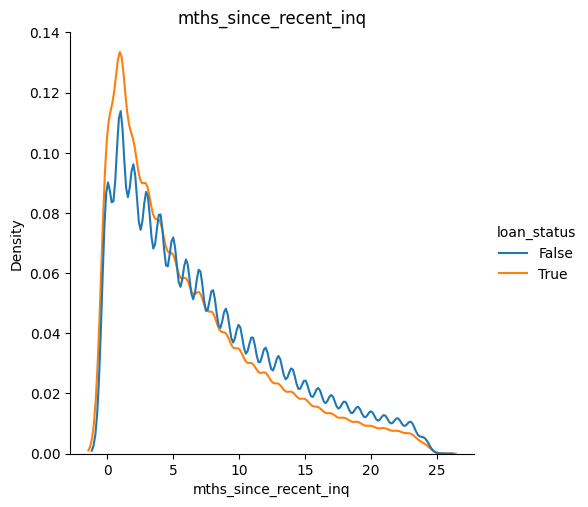

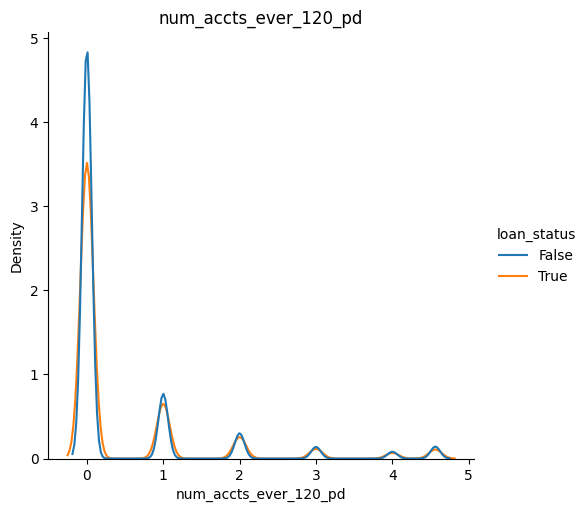

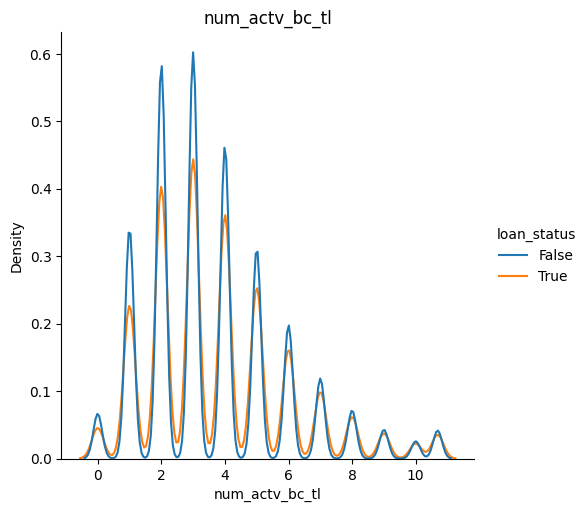

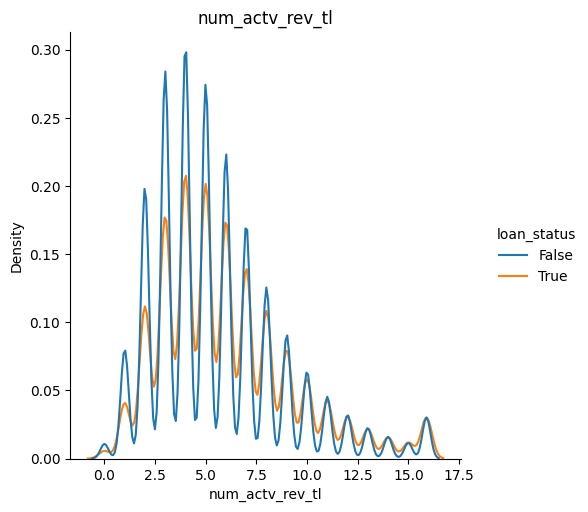

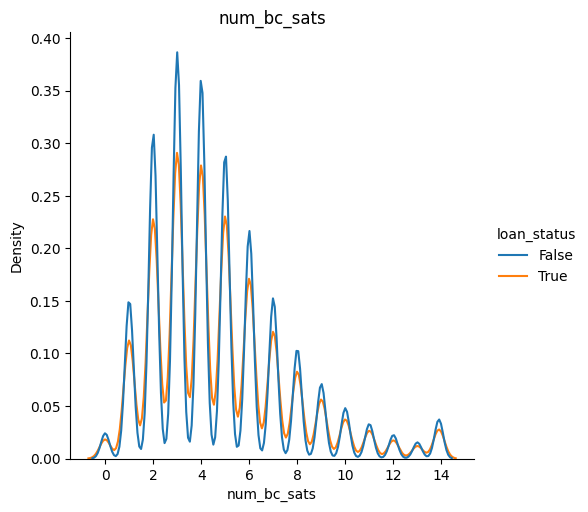

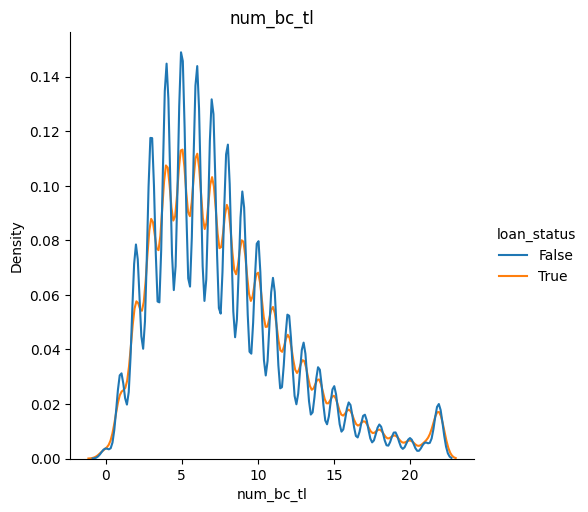

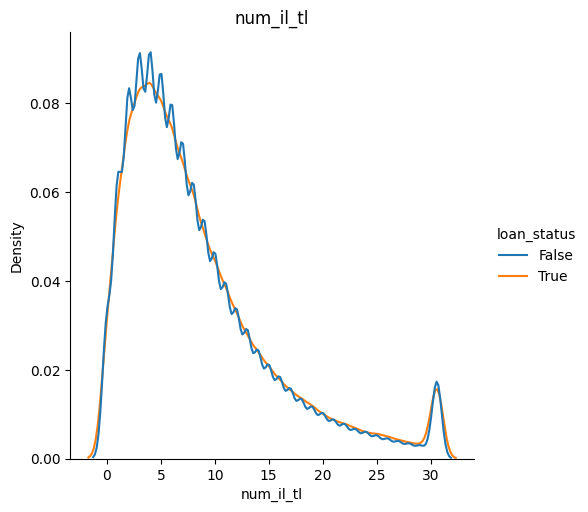

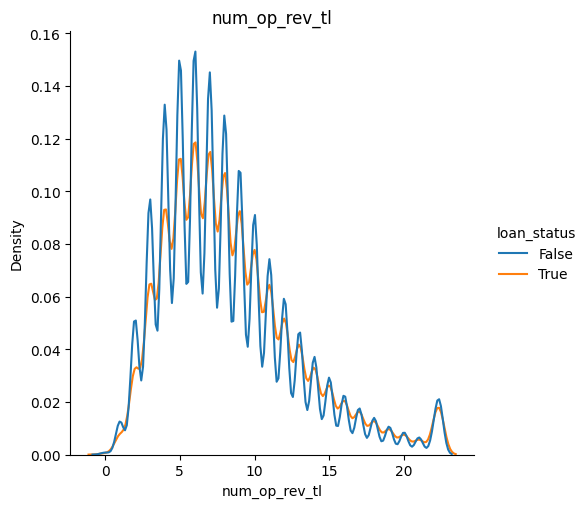

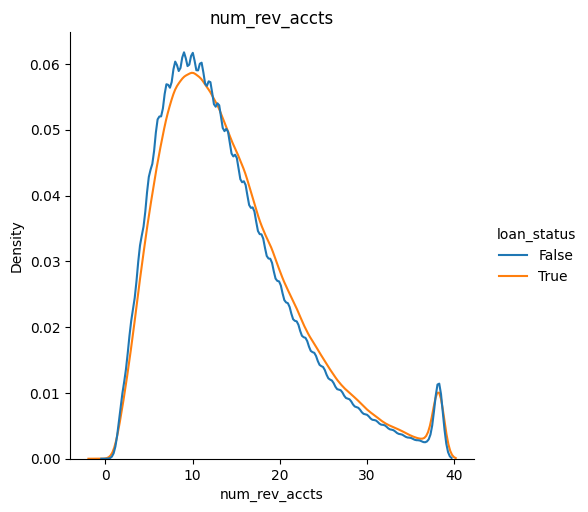

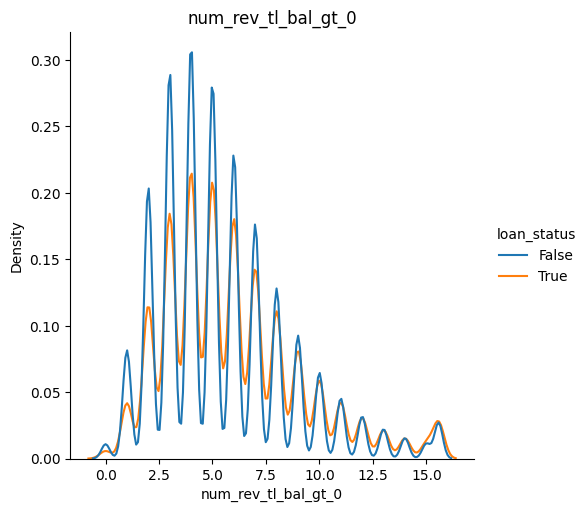

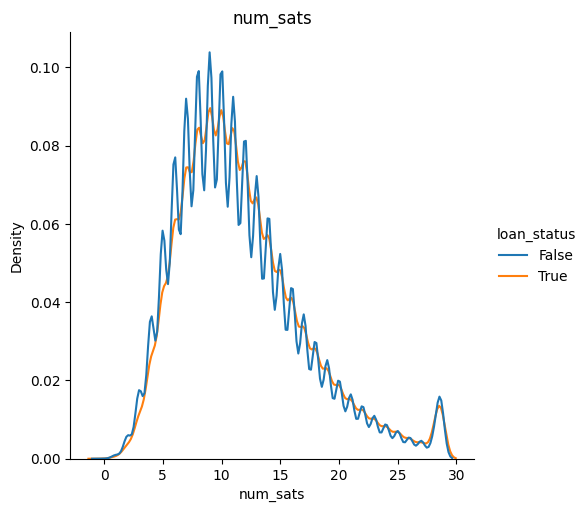

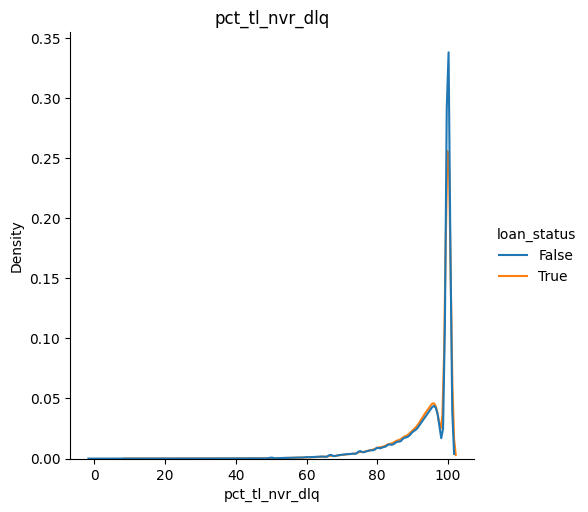

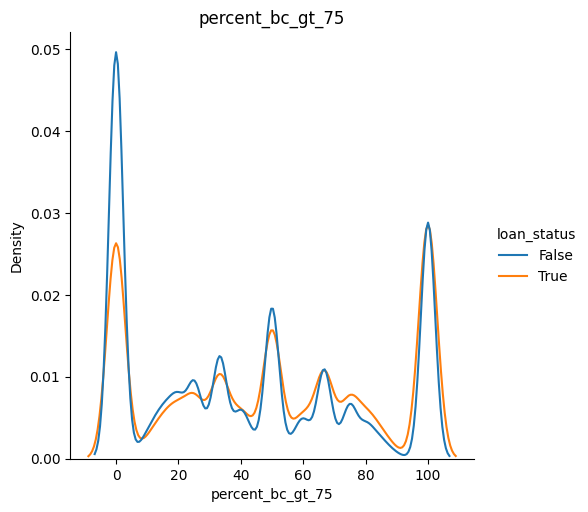

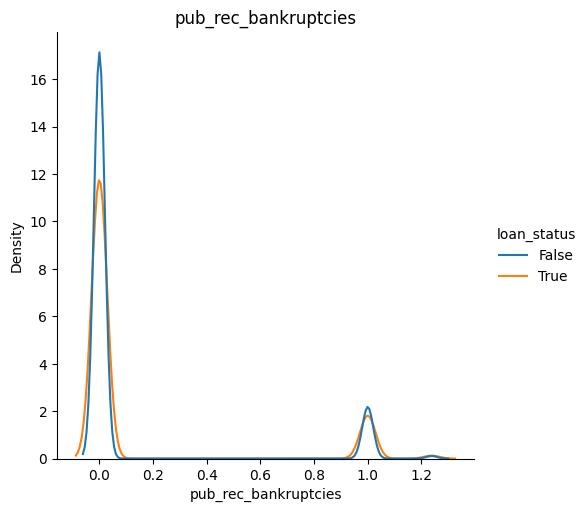

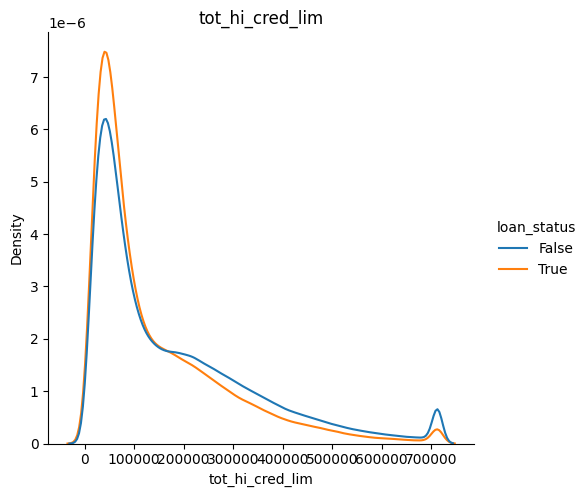

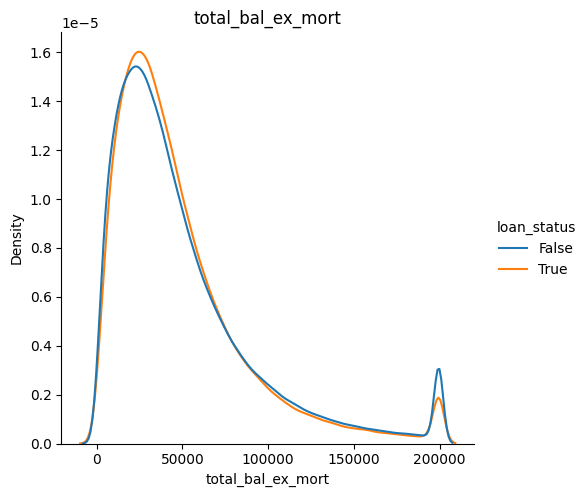

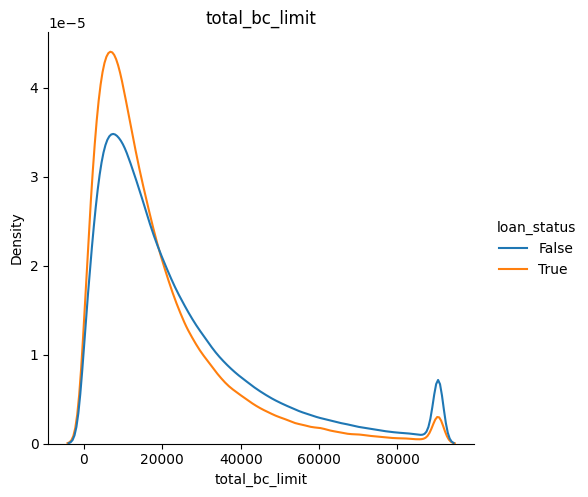

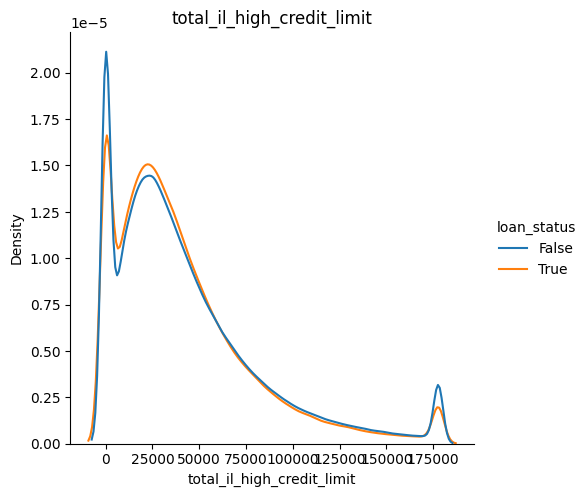

In [35]:
for colname in numeric_col:
    sns.displot(df, x=colname, hue=bad_loan_index, kind="kde", common_norm=False).set(title=colname)
    plt.show()

# Q1 Step 3 Completed

In [36]:
pickle.dump(df, open('Q1_Step3.pkl', 'wb'))

# Q1 Step 4: Missing Values Handling

In [37]:
df = pickle.load(open('Q1_Step3.pkl','rb'))

In [38]:
has_na_colname = df[df.columns[df.isna().any()]].columns

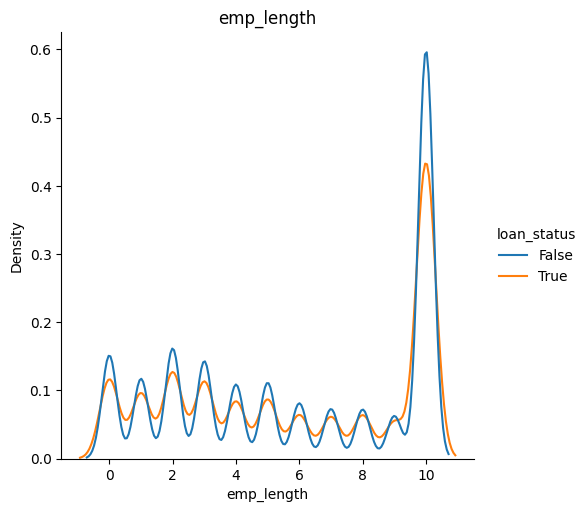

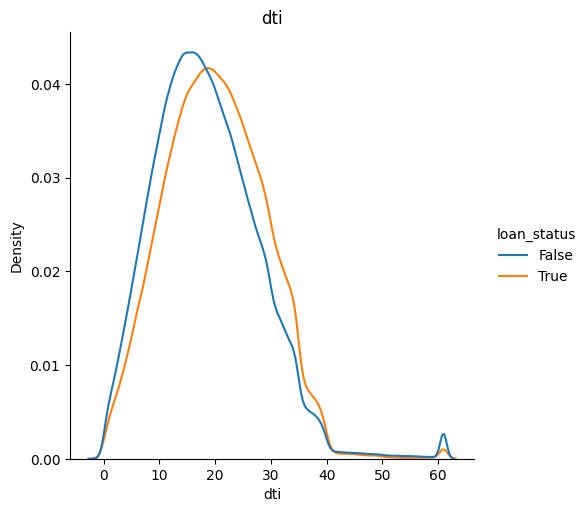

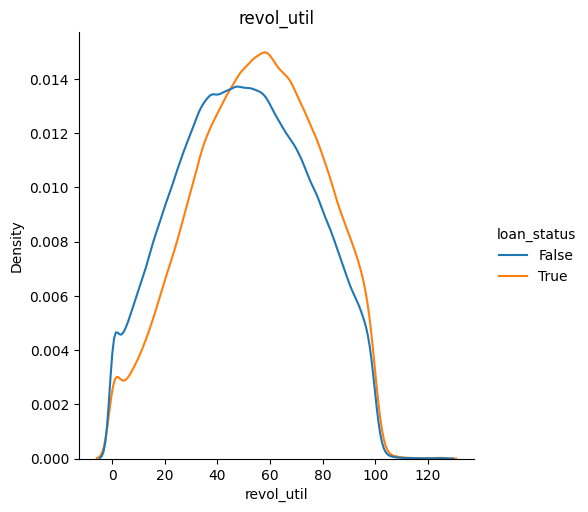

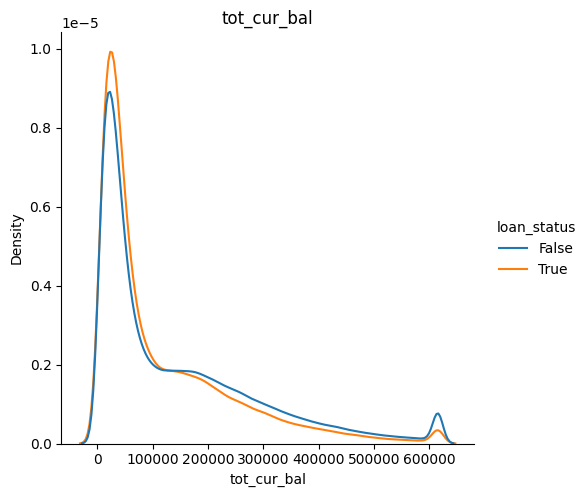

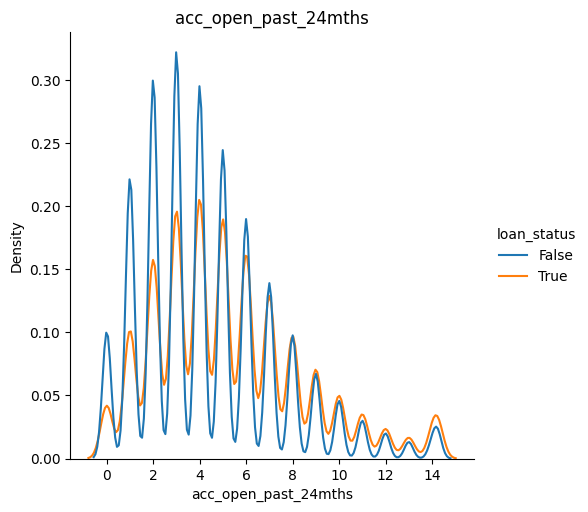

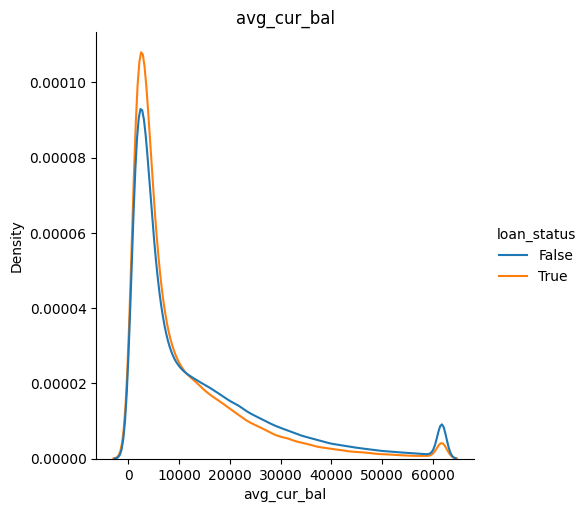

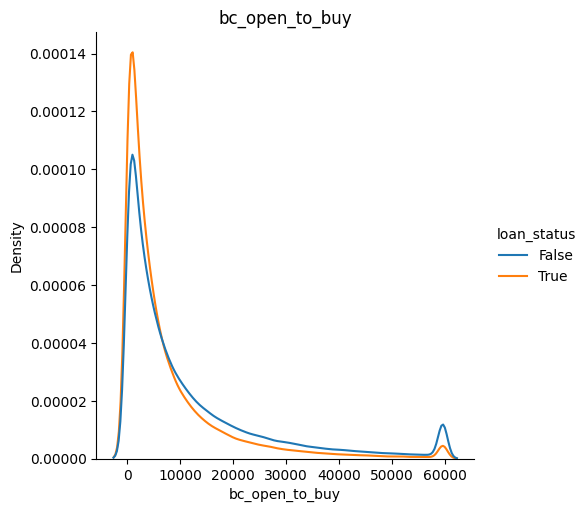

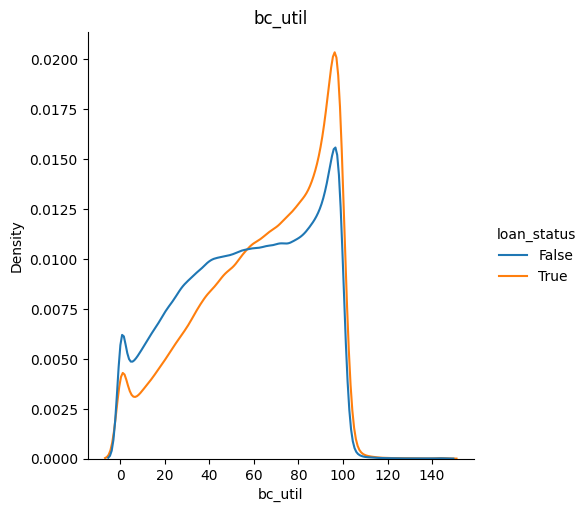

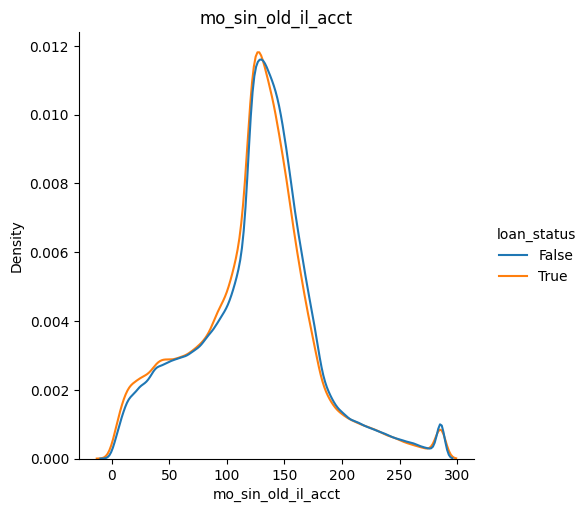

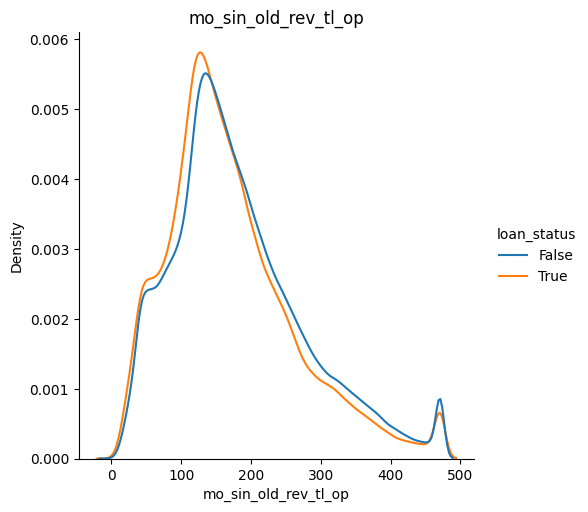

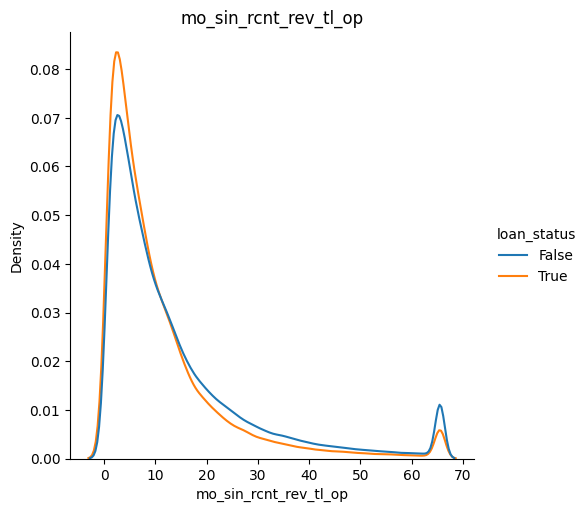

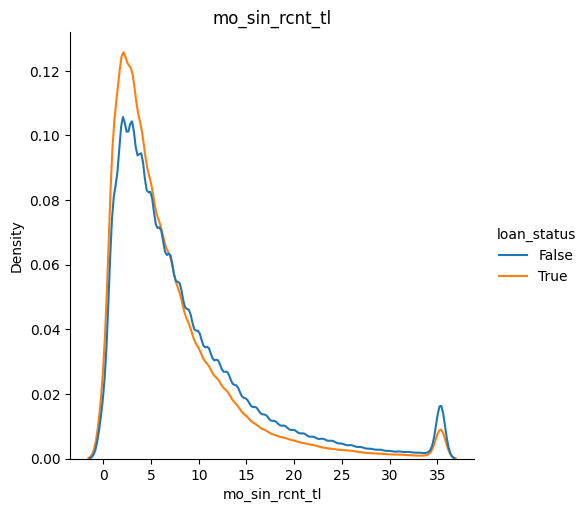

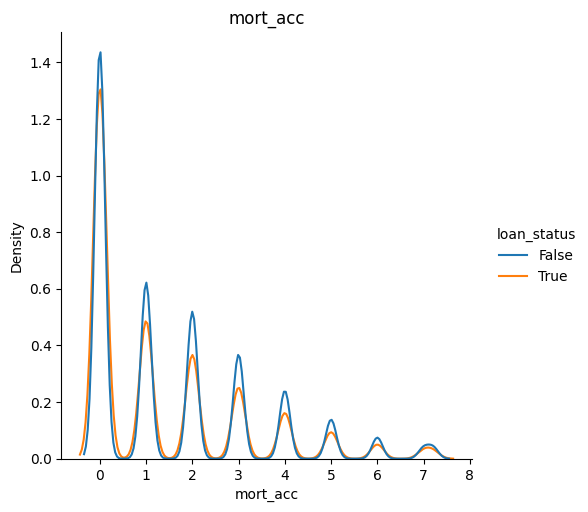

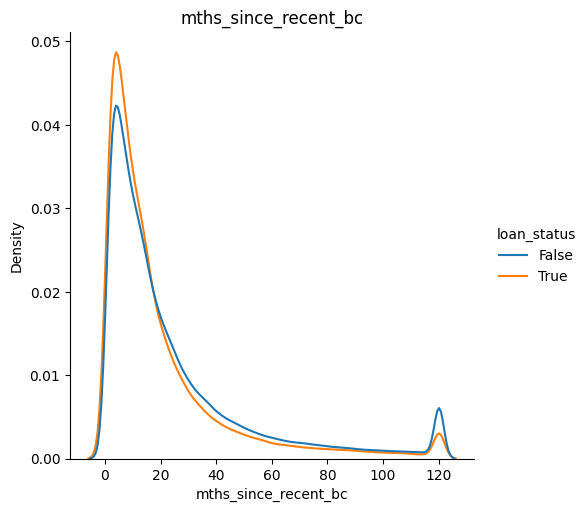

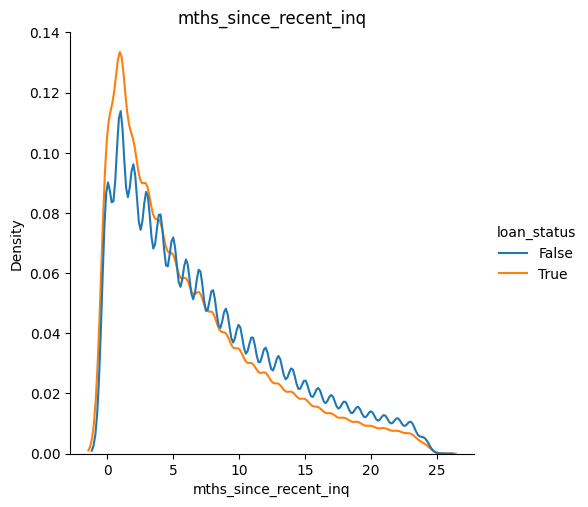

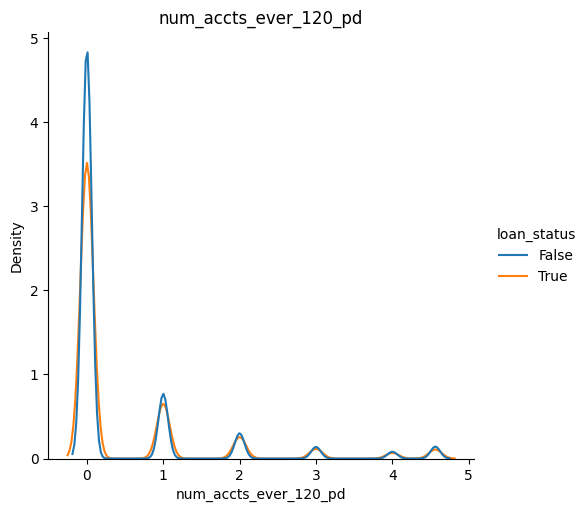

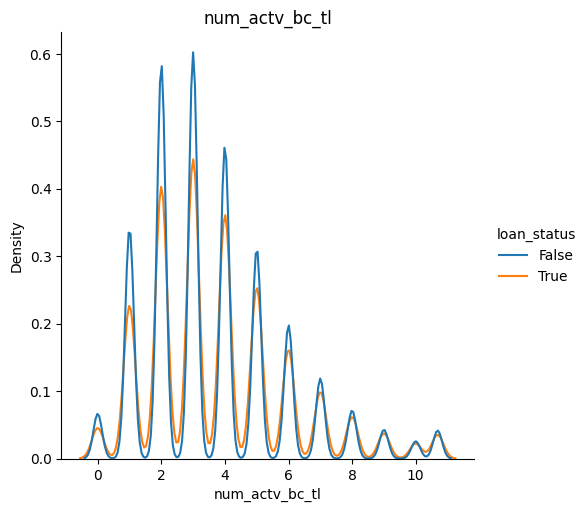

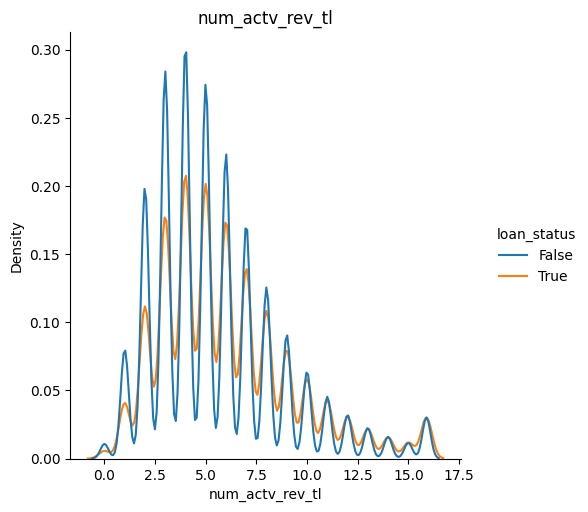

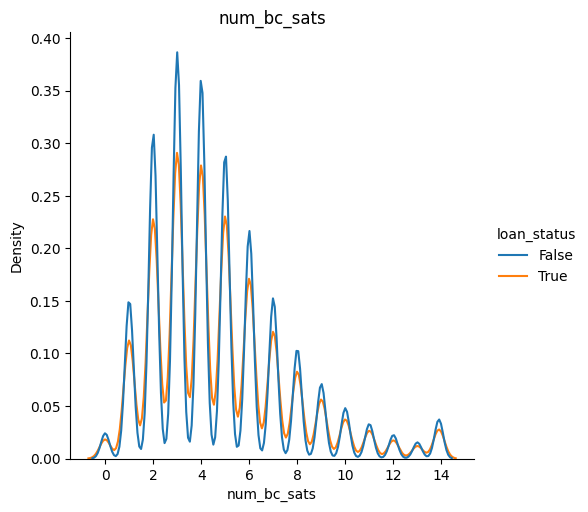

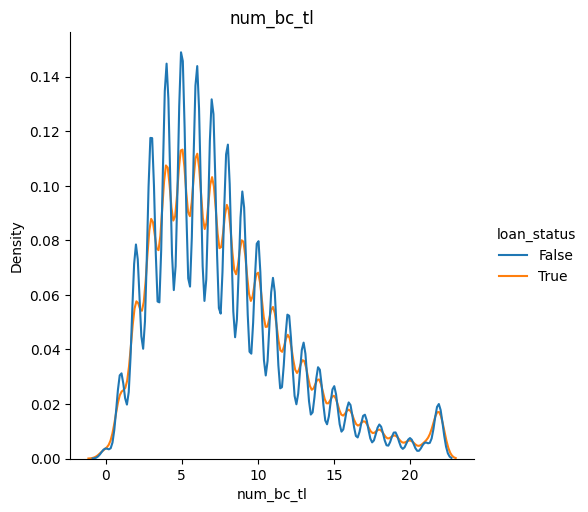

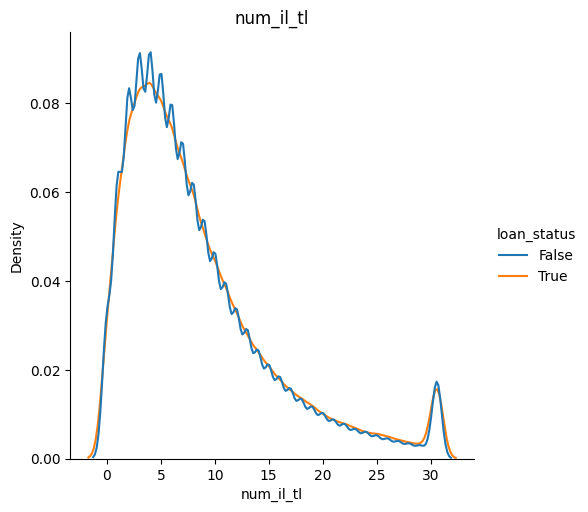

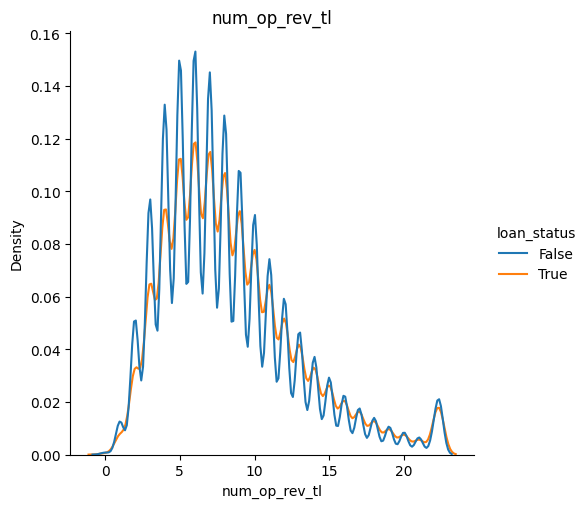

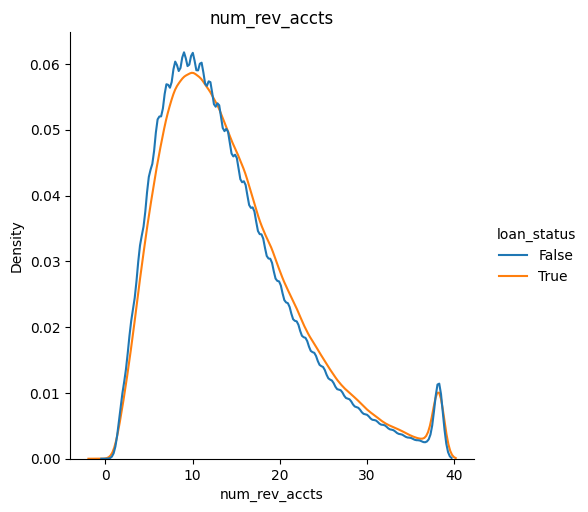

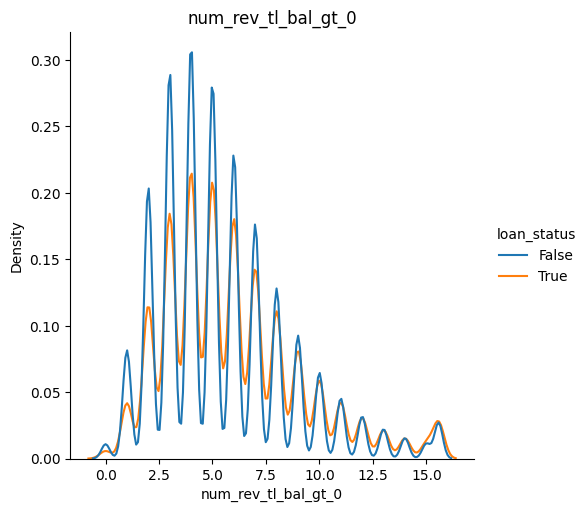

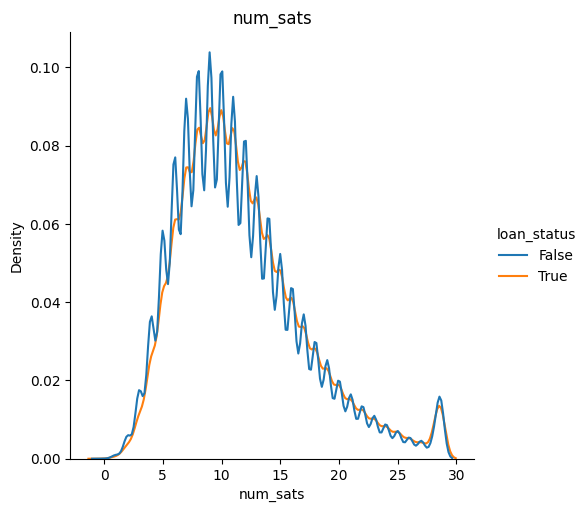

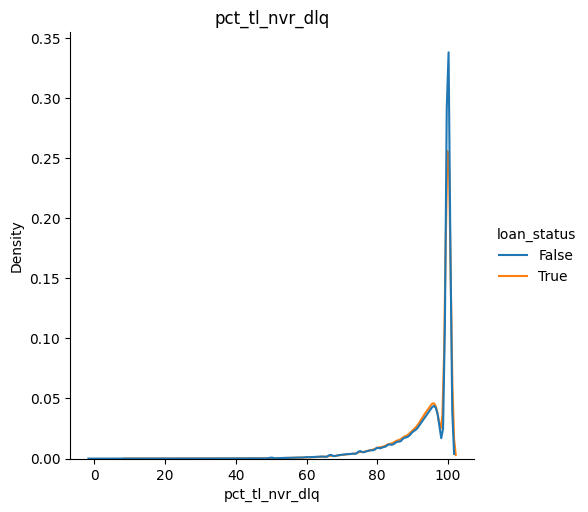

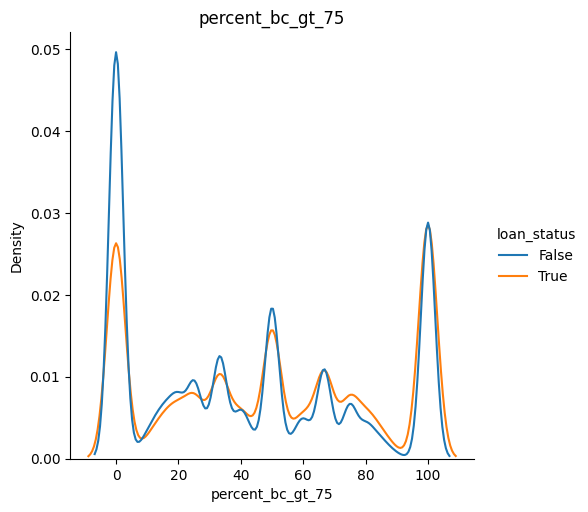

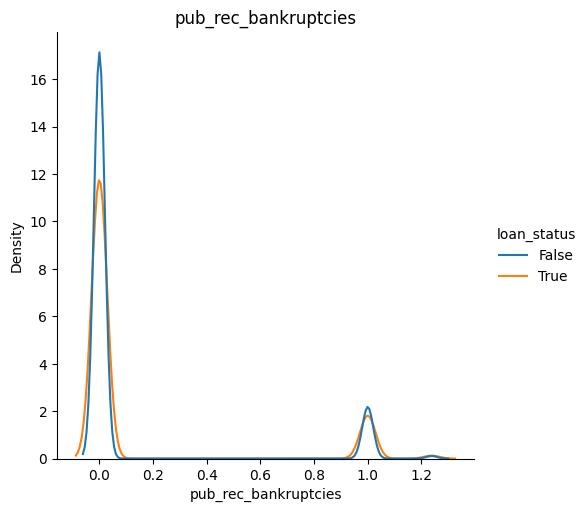

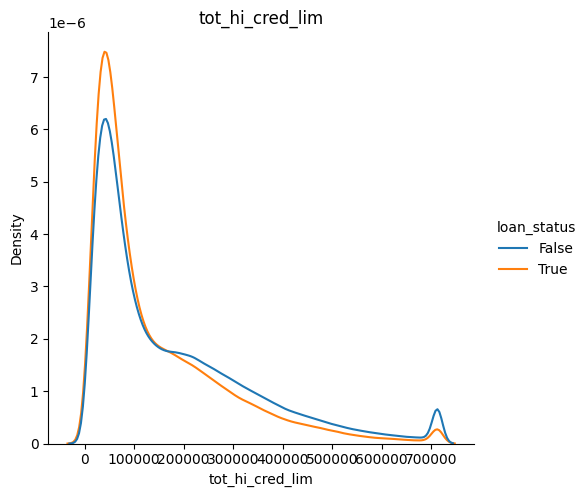

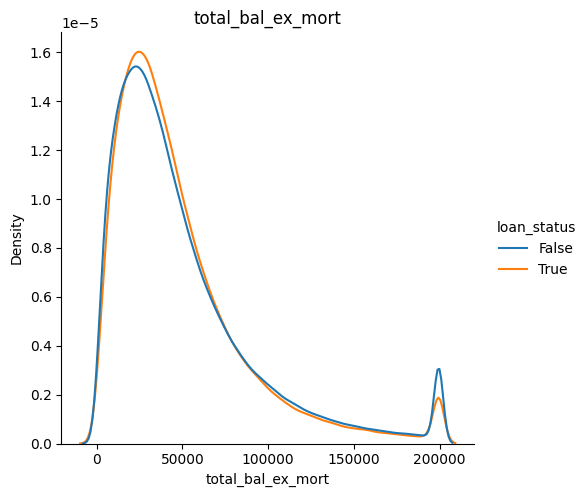

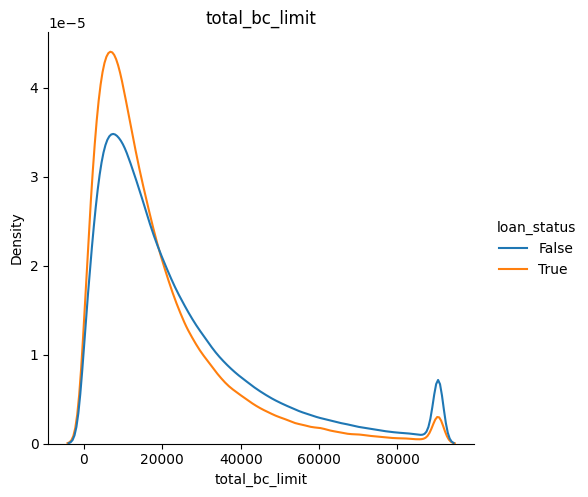

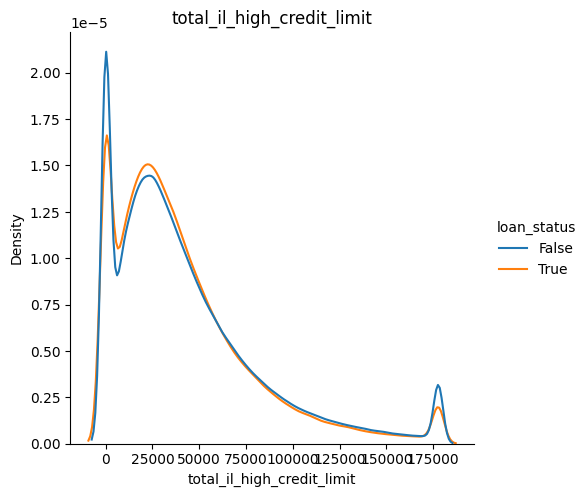

In [39]:
for colname in has_na_colname:
    sns.displot(df, x=colname, hue=bad_loan_index, kind="kde", common_norm=False).set(title=colname)
    plt.show()

Since most of the variables with missing values are not normally distributed, and none of them has strong reason to neither impute 0 nor a maximum cap, we will impute the median.

### Imputation

In [40]:
for candidate in has_na_colname:
    df[candidate] = df[candidate].fillna(np.nanmedian(df[candidate]))

### Check Results:

<AxesSubplot:>

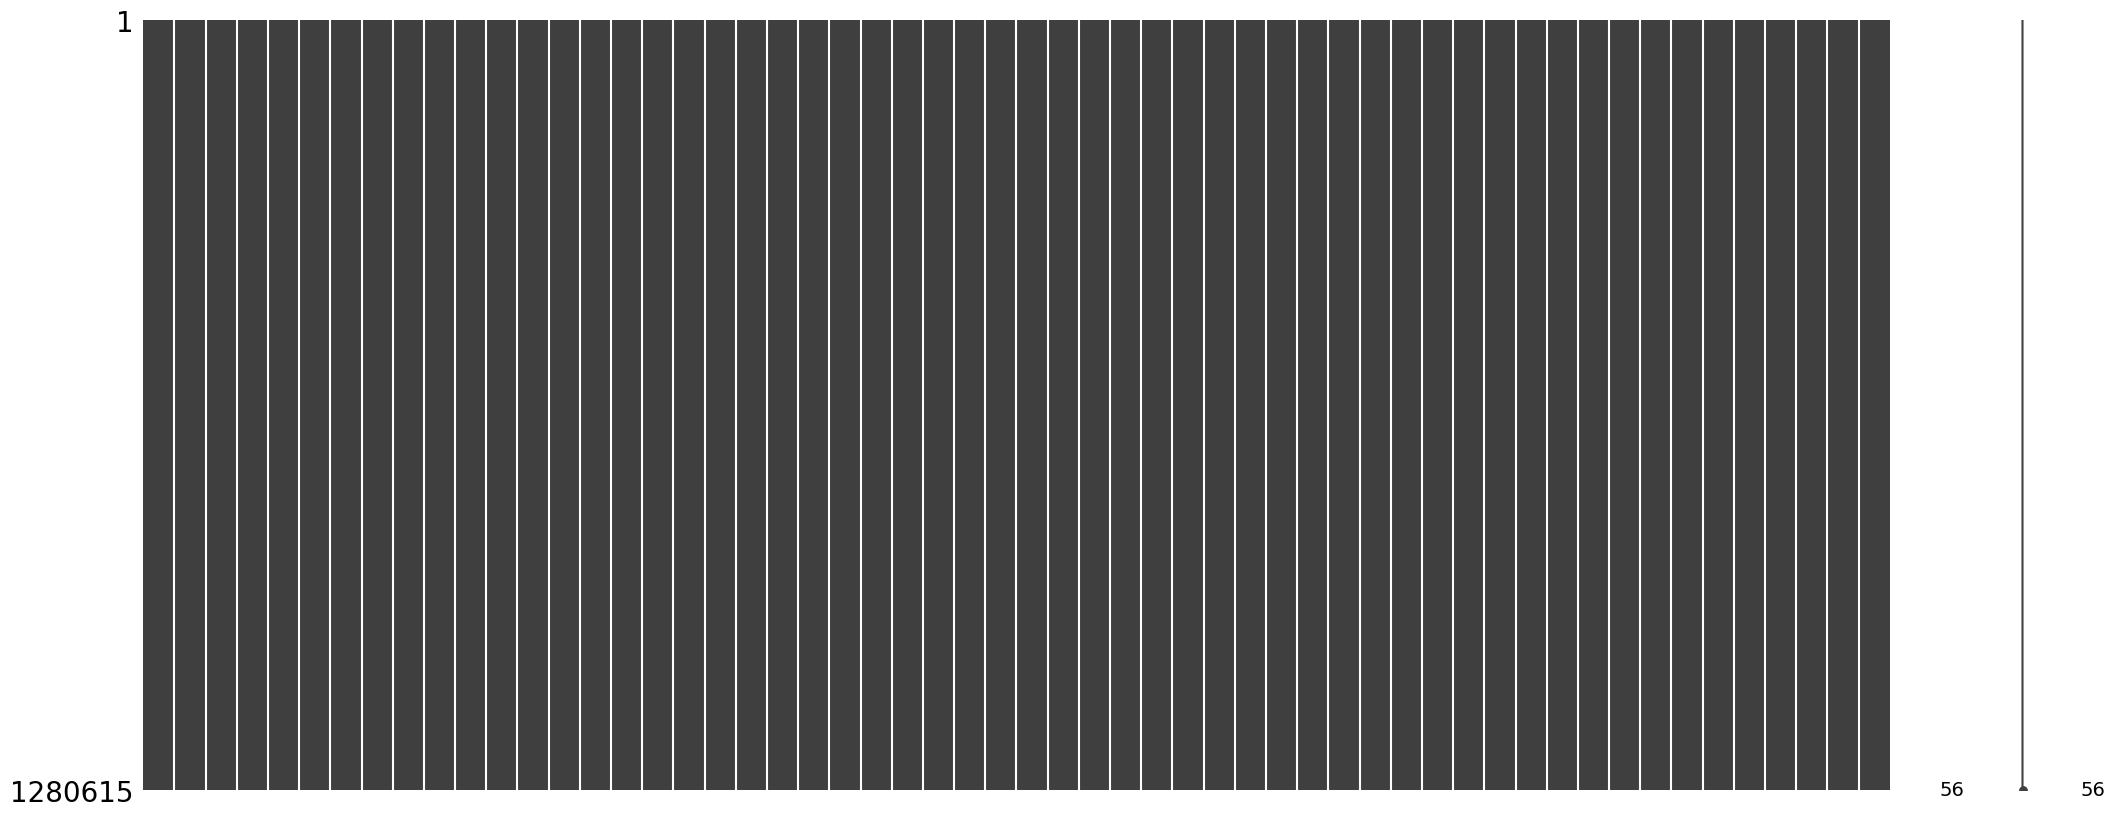

In [41]:
msno.matrix(df)

# Step 4 Complete

In [42]:
pickle.dump(df, open('Q1_Step4.pkl', 'wb'))

# Step 5 Deisgn Variables

In [43]:
df = pickle.load(open('Q1_Step4.pkl', 'rb'))
bad_loan_index = (df.loan_status == "Charged Off") | (df.loan_status == "Default")

### Design Ratio: Log of Loan to Credit Limit Ratio

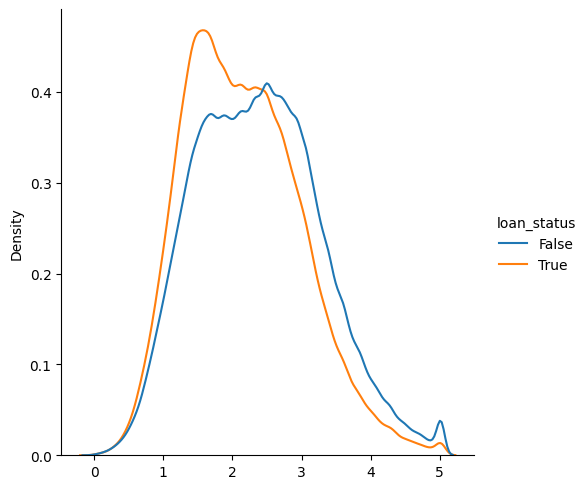

In [44]:
sns.displot(x=list_truncation(np.log(df.tot_hi_cred_lim /df.loan_amnt + 1)), hue=bad_loan_index, kind="kde", common_norm=False)

In [45]:
df["log_loan_to_credit_limit"] = list_truncation(np.log(df.tot_hi_cred_lim /df.loan_amnt + 1))

### Design Ratio: Log Annual Income over Installment squared

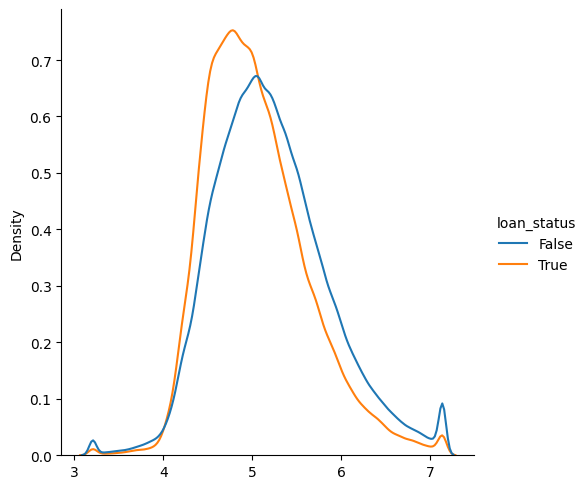

In [46]:
tmp = list_truncation(np.log(df.annual_inc/df.installment + 1))
sns.displot(x= tmp, hue=bad_loan_index, kind="kde", common_norm=False)

In [47]:
df["log_annul_inc_over_inst2"] = list_truncation(np.log(df.annual_inc/df.installment+ 1))

### Average: Average Month Since Last Acc

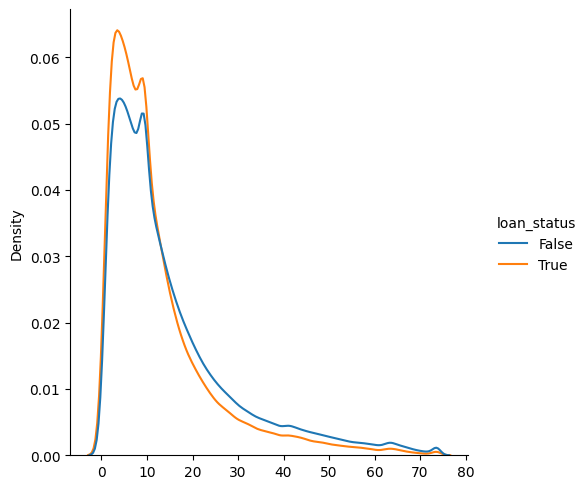

In [48]:
tmp = (df.mo_sin_rcnt_rev_tl_op + df.mo_sin_rcnt_tl + df.mths_since_recent_bc) / 3
sns.displot(x= tmp, hue=bad_loan_index, kind="kde", common_norm=False)

In [49]:
df["avg_mths_since_rcnt_acc"] = (df.mo_sin_rcnt_rev_tl_op + df.mo_sin_rcnt_tl + df.mths_since_recent_bc) / 3

# Data Cleaning COMPLETE

In [50]:
pickle.dump(df, open('Q1_Step5.pkl', 'wb'))

In [51]:
pickle.dump(df, open('Q1.pkl', 'wb'))